## Chatbot Arena Ranksets

This notebook produces Figures 3, 4, 9 and 10, which are stored in `figures/chatbot_arena_ranksets/`.

It requires the output of the Chatbot Arena experiment, which is obtained by running `scripts/llm-ranking.sh` and stored in `outputs/chatbot_arena/`.

### Imports and plot parameters

In [1]:
import json
import os
from statistics import mean,stdev
import numpy as np

import sys
sys.path.append('../src')
from plot_utils import Result, ExperimentCollection, PlotIntersectSize, PlotRanksets

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.latex.preamble'] = r'\usepackage{amsmath,amsfonts,geometry}'
mpl.rcParams['axes.formatter.use_mathtext'] = True
plt.rcParams.update({
    'font.family':'serif',
    "font.serif": ["Computer Modern Roman"],
    "text.usetex": True,
    "font.size": 35,
    "figure.figsize":(33,18),
    "lines.markersize": 20
})
plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

In [2]:
# NOTE: replace labels with correct names
label_mapping={'baseline':r'$\textsc{Baseline}$',
               'human only':r'$\textsc{Human Only}$',
               'llm (claude-3-opus)':r'$\textsc{Llm Cl3}$',
               'llm (gpt-4-0125-preview)':r'$\textsc{Llm Gpt4}$',
               'llm (gpt-3.5-turbo)':r'$\textsc{Llm Gpt3.5}$',
               'ppr (claude-3-opus)': r'$\textsc{Ppr Cl3}$',
               'ppr (gpt-4-0125-preview)': r'$\textsc{Ppr Gpt4}$',
               'ppr (gpt-3.5-turbo)': r'$\textsc{Ppr Gpt3.5}$'}
model_mapping={'gpt-4': 'GPT 4',
                        'claude-v1': 'Claude 1',
                        'claude-instant-v1': 'Claude 1-I',
                        'gpt-3.5-turbo': 'GPT 3.5',
                        'vicuna-13b': 'Vicuna',
                        'palm-2': 'PaLM 2',
                        'koala-13b': 'Koala',
                        'RWKV-4-Raven-14B': 'RWKV',
                        'oasst-pythia-12b': 'Pythia',
                        'alpaca-13b': 'Alpaca',
                        'chatglm-6b': 'ChatGLM',
                        'fastchat-t5-3b': 'FastChat'
                        }
model_mapping_bold={'gpt-4': r'$\textbf{GPT 4}$',
                       'claude-v1': r'$\textbf{Claude 1}$',
                       'claude-instant-v1': r'$\textbf{Claude 1-I}$',
                       'gpt-3.5-turbo': r'$\textbf{GPT 3.5}$',
                       'vicuna-13b': r'$\textbf{Vicuna}$',
                       'palm-2': r'$\textbf{PaLM 2}$',
                       'koala-13b': r'$\textbf{Koala}$',
                       'RWKV-4-Raven-14B': r'$\textbf{RWKV}$',
                       'oasst-pythia-12b': r'$\textbf{Pythia}$',
                       'alpaca-13b': r'$\textbf{Alpaca}$',
                       'chatglm-6b': r'$\textbf{ChatGLM}$',
                       'fastchat-t5-3b': r'$\textbf{FastChat}$'
                       }
markers={'baseline':'*',
         'human only':'o',
         'llm (gpt-4-0125-preview)':'v',
         'llm (claude-3-opus)':'P',
         'llm (gpt-3.5-turbo)':'D',
         'ppr (claude-3-opus)': 'X',
         'ppr (gpt-4-0125-preview)': '^',
         'ppr (gpt-3.5-turbo)': 's'}
linestyles={'baseline':'-',
         'human only':'dashed',
         'llm (gpt-4-0125-preview)':'dashdot',
         'llm (claude-3-opus)':'dashdot',
         'llm (gpt-3.5-turbo)':'dashdot',
         'ppr (claude-3-opus)': 'dashdot',
         'ppr (gpt-4-0125-preview)': 'dotted',
         'ppr (gpt-3.5-turbo)': 'dotted'}

### Empirical probability of ranks

Figures 3 and 9.

In [8]:
results = Result('../outputs/chatbot_arena/n1000_a05/')
results.do_analysis()

Saved figure at ../figures/chatbot_arena_ranksets/ranks_3_n1000_a05
Saved figure at ../figures/chatbot_arena_ranksets/ranks_8_n1000_a05


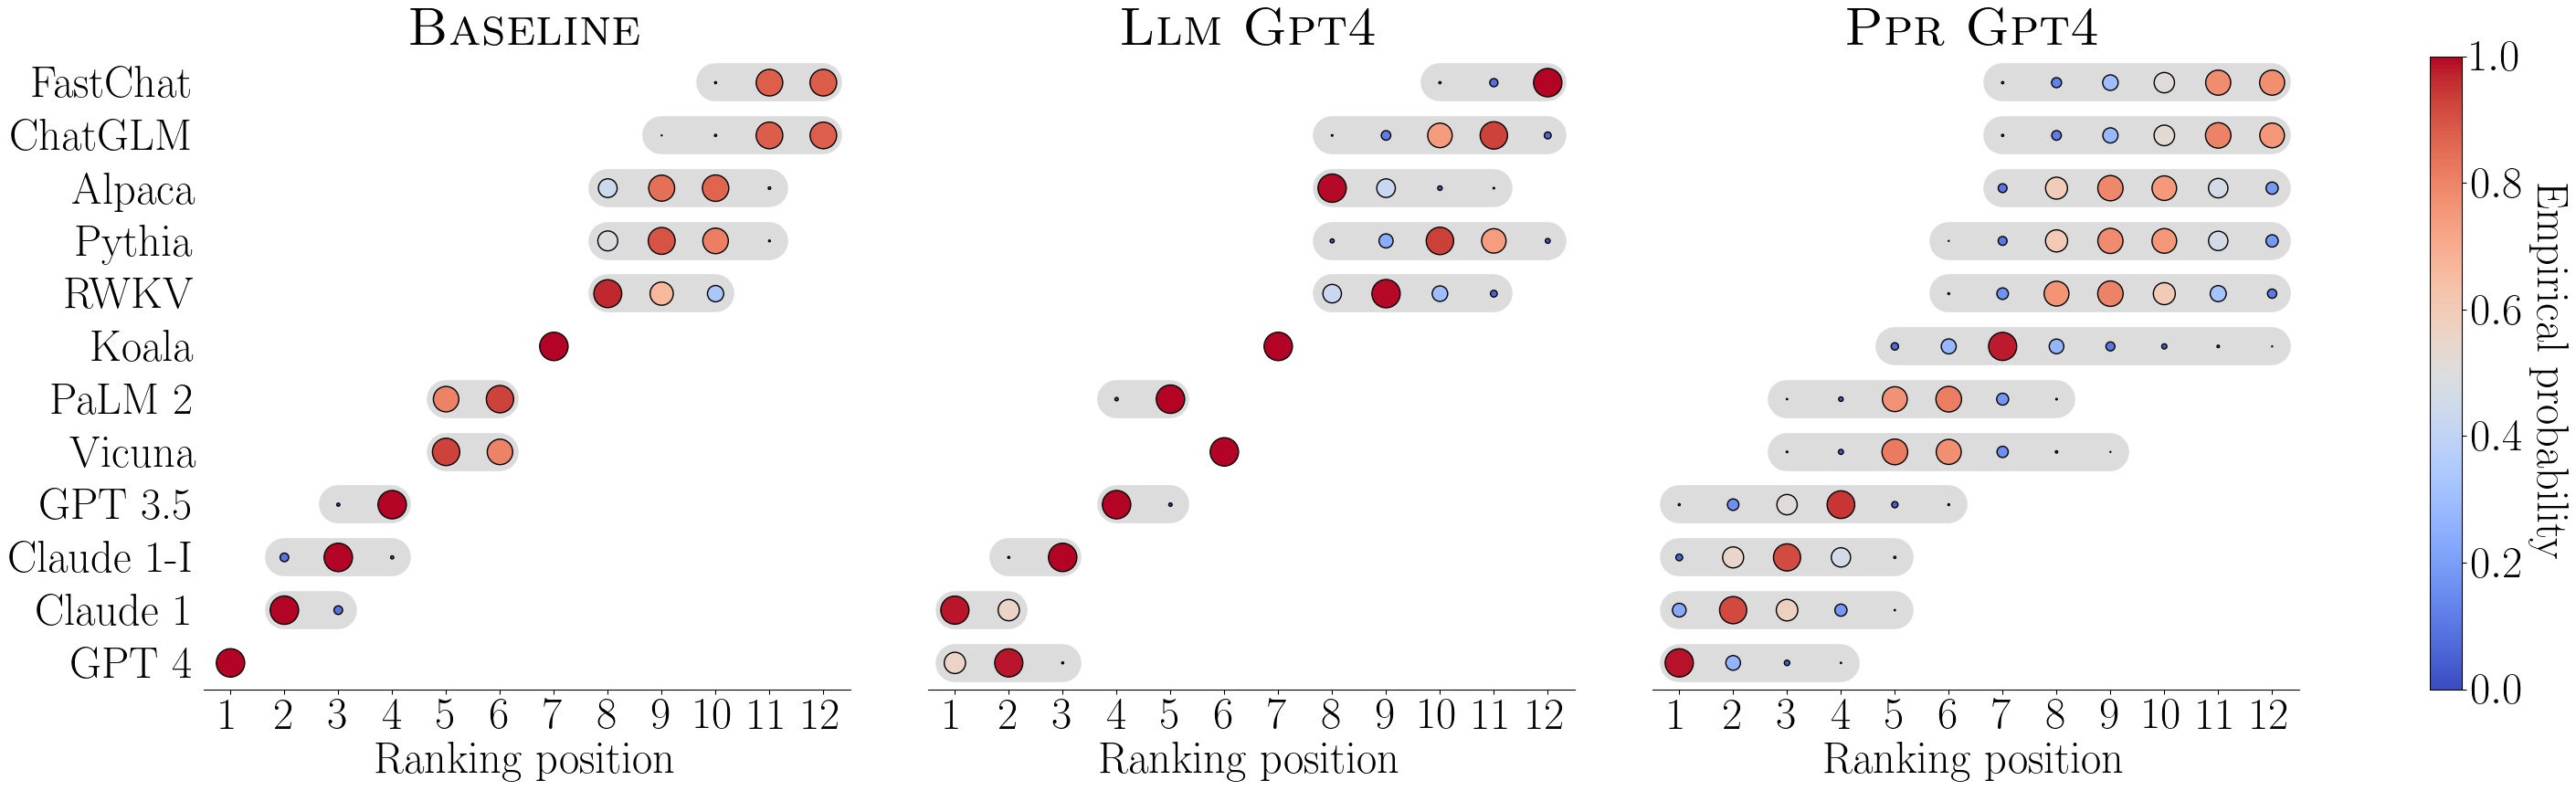

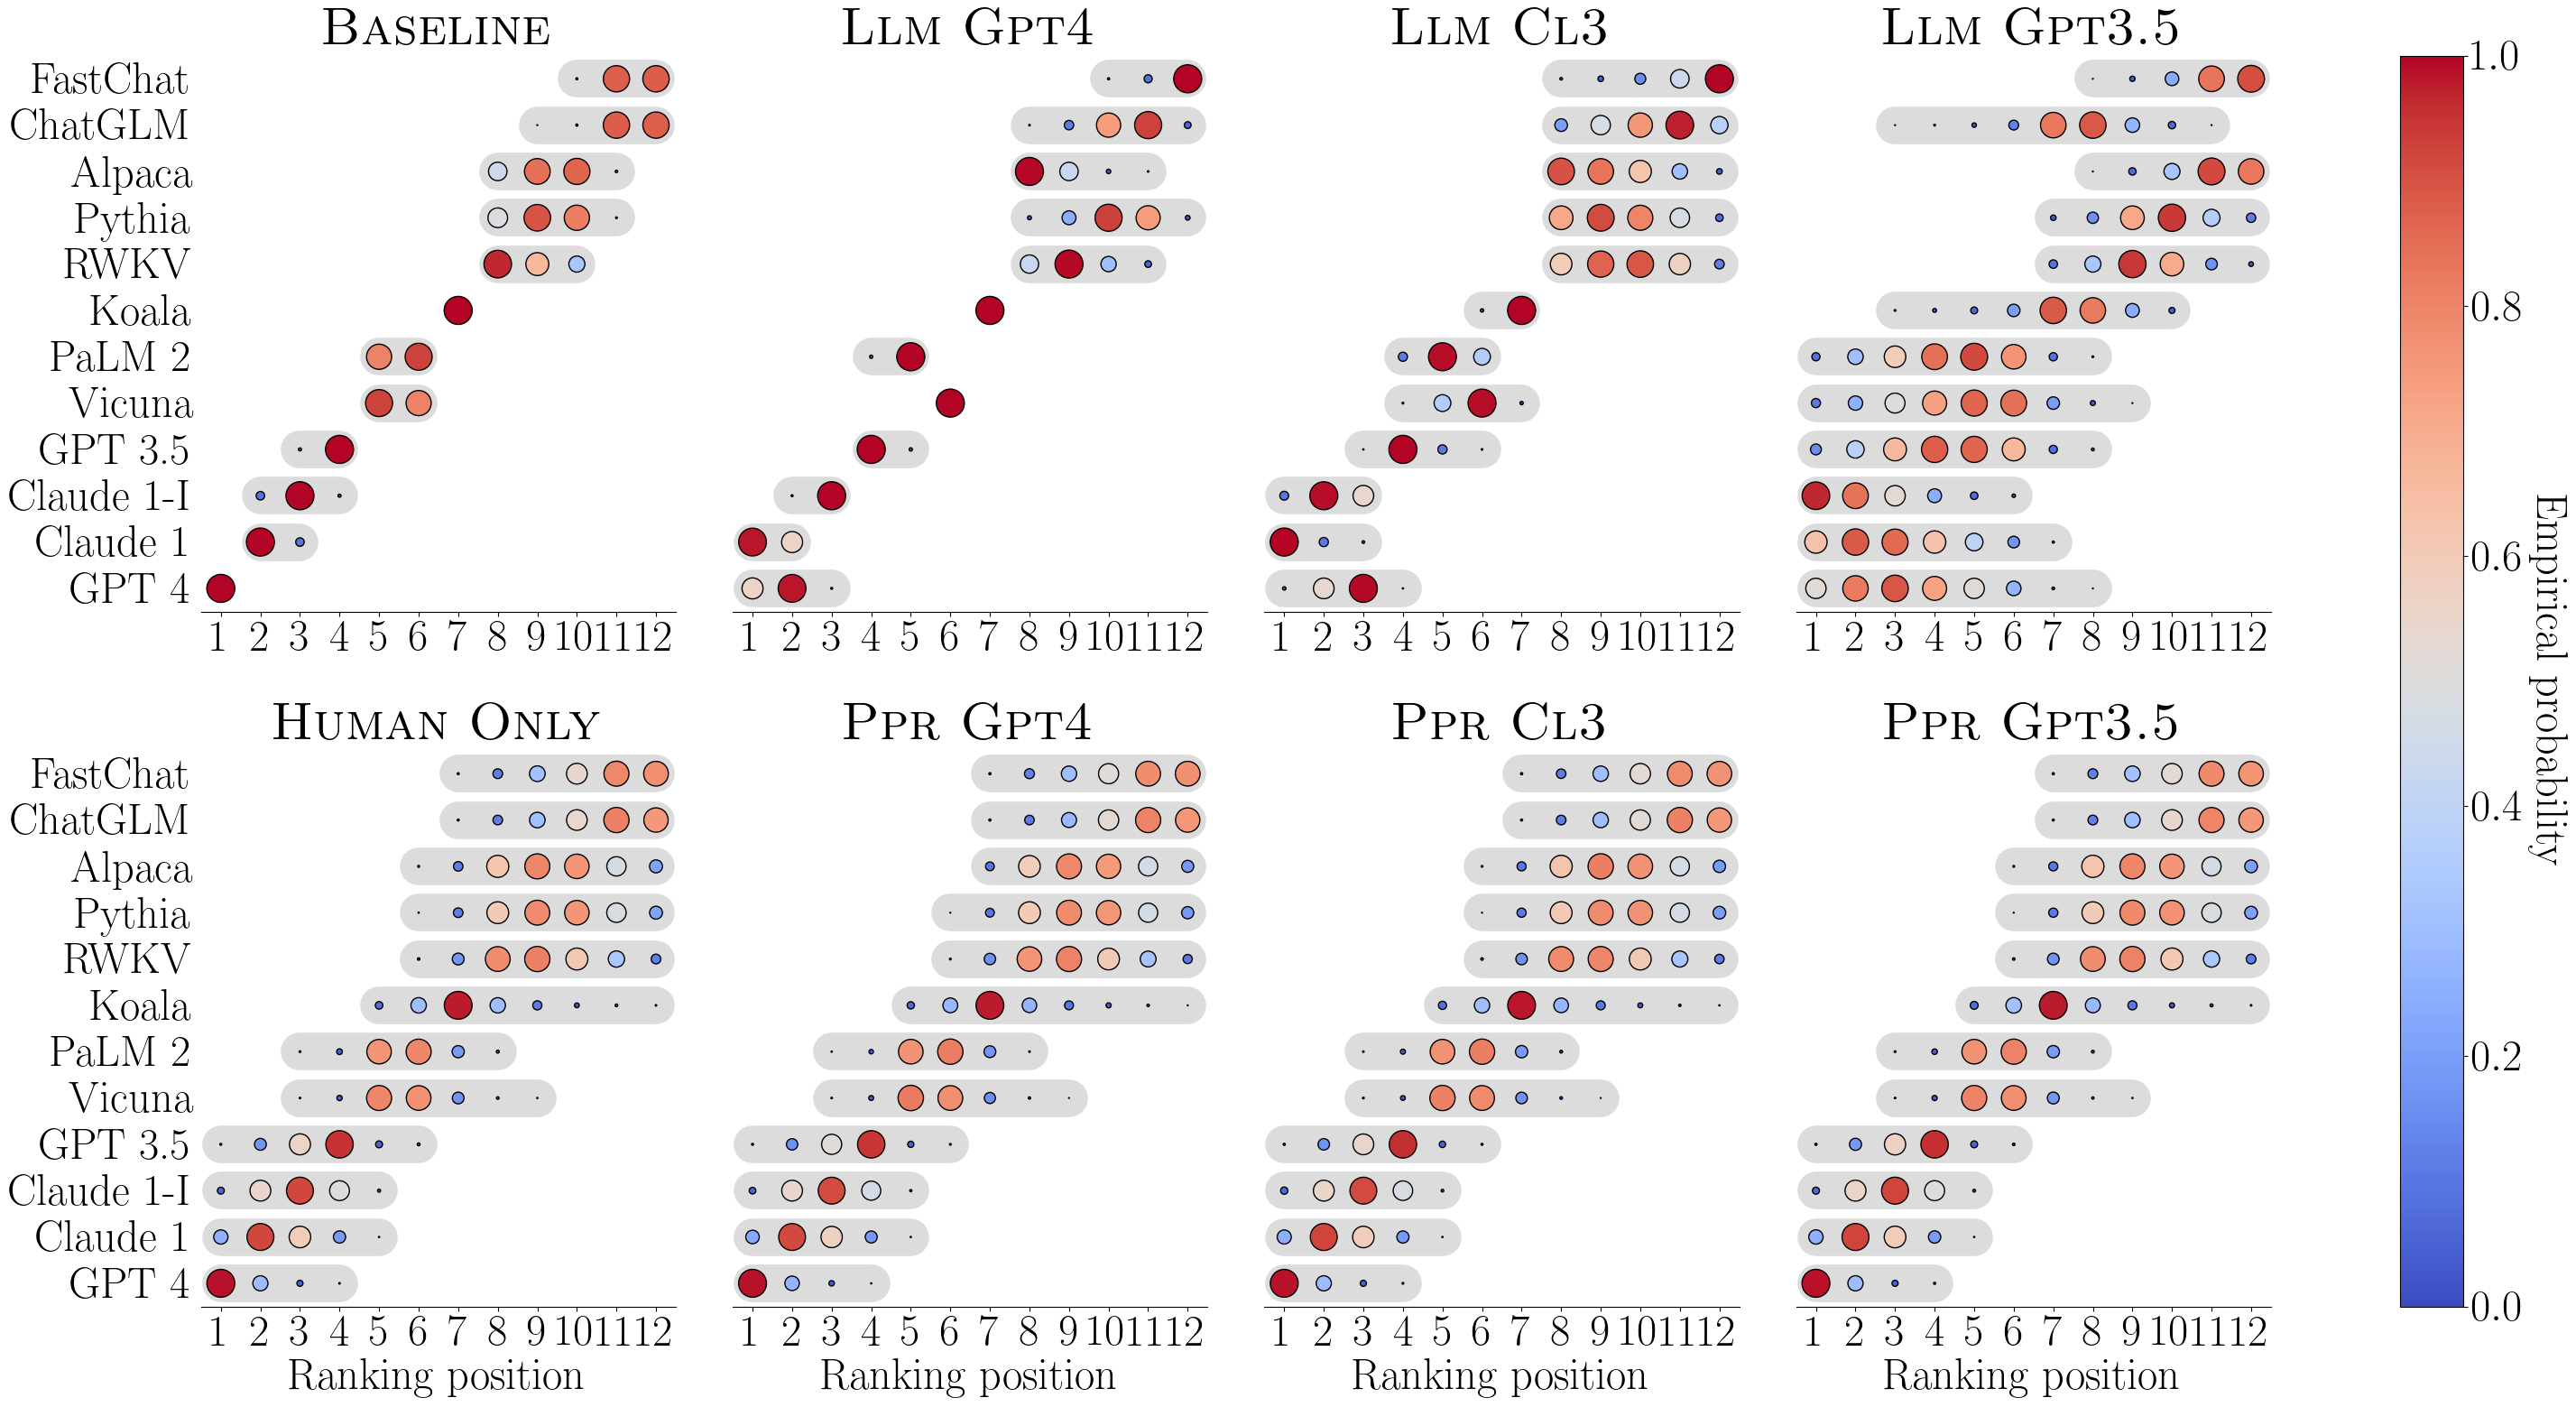

In [9]:
plotter=PlotRanksets(results,label_mapping)
plotter.set_model_mapping(model_mapping)
plotter.plot_ranks_dots6(['baseline','llm (gpt-4-0125-preview)','ppr (gpt-4-0125-preview)'])
plotter.plot_ranks_dots6(results.methods)

### Empirical probability of rank-sets

Figures 4 and 10.

In [10]:
results = Result('../outputs/chatbot_arena/n1000_a05/')
results.do_analysis()

Saved figure at ../figures/chatbot_arena_ranksets/ranksets_main_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_gpt-4_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_claude-v1_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_claude-instant-v1_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_gpt-3.5-turbo_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_vicuna-13b_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_palm-2_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_koala-13b_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_RWKV-4-Raven-14B_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_model_oasst-pythia-12b_n1000_a05.pdf
Saved figure at ../figures/chatbot_arena_ranksets/all_ranksets_mo

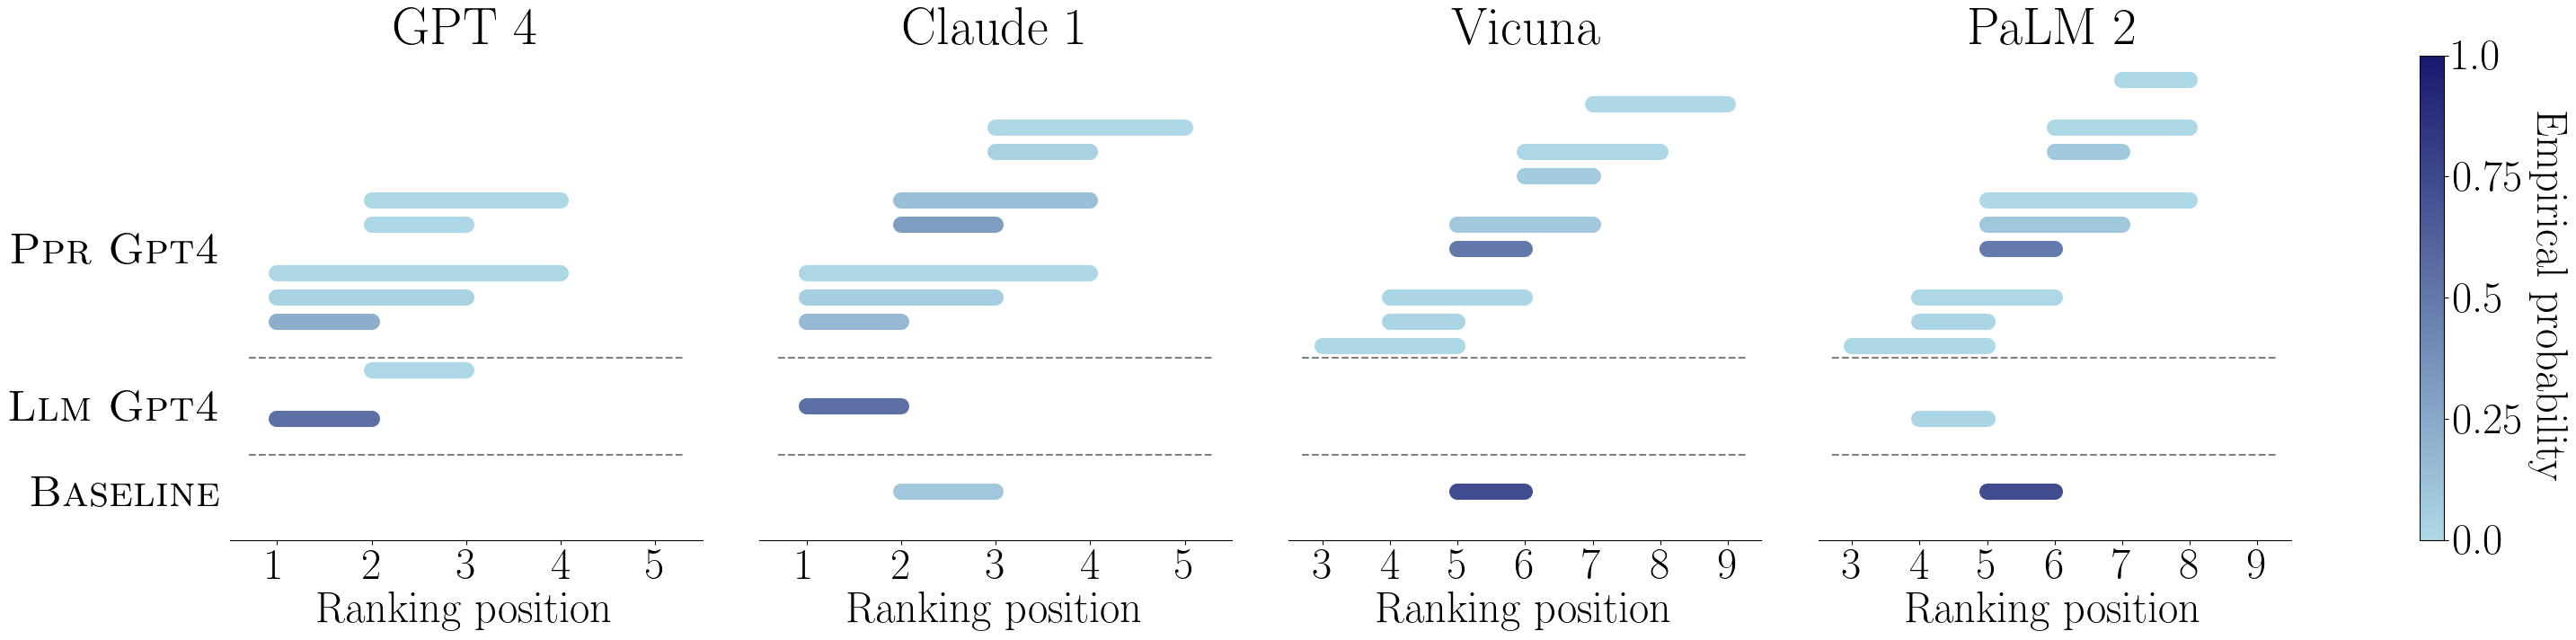

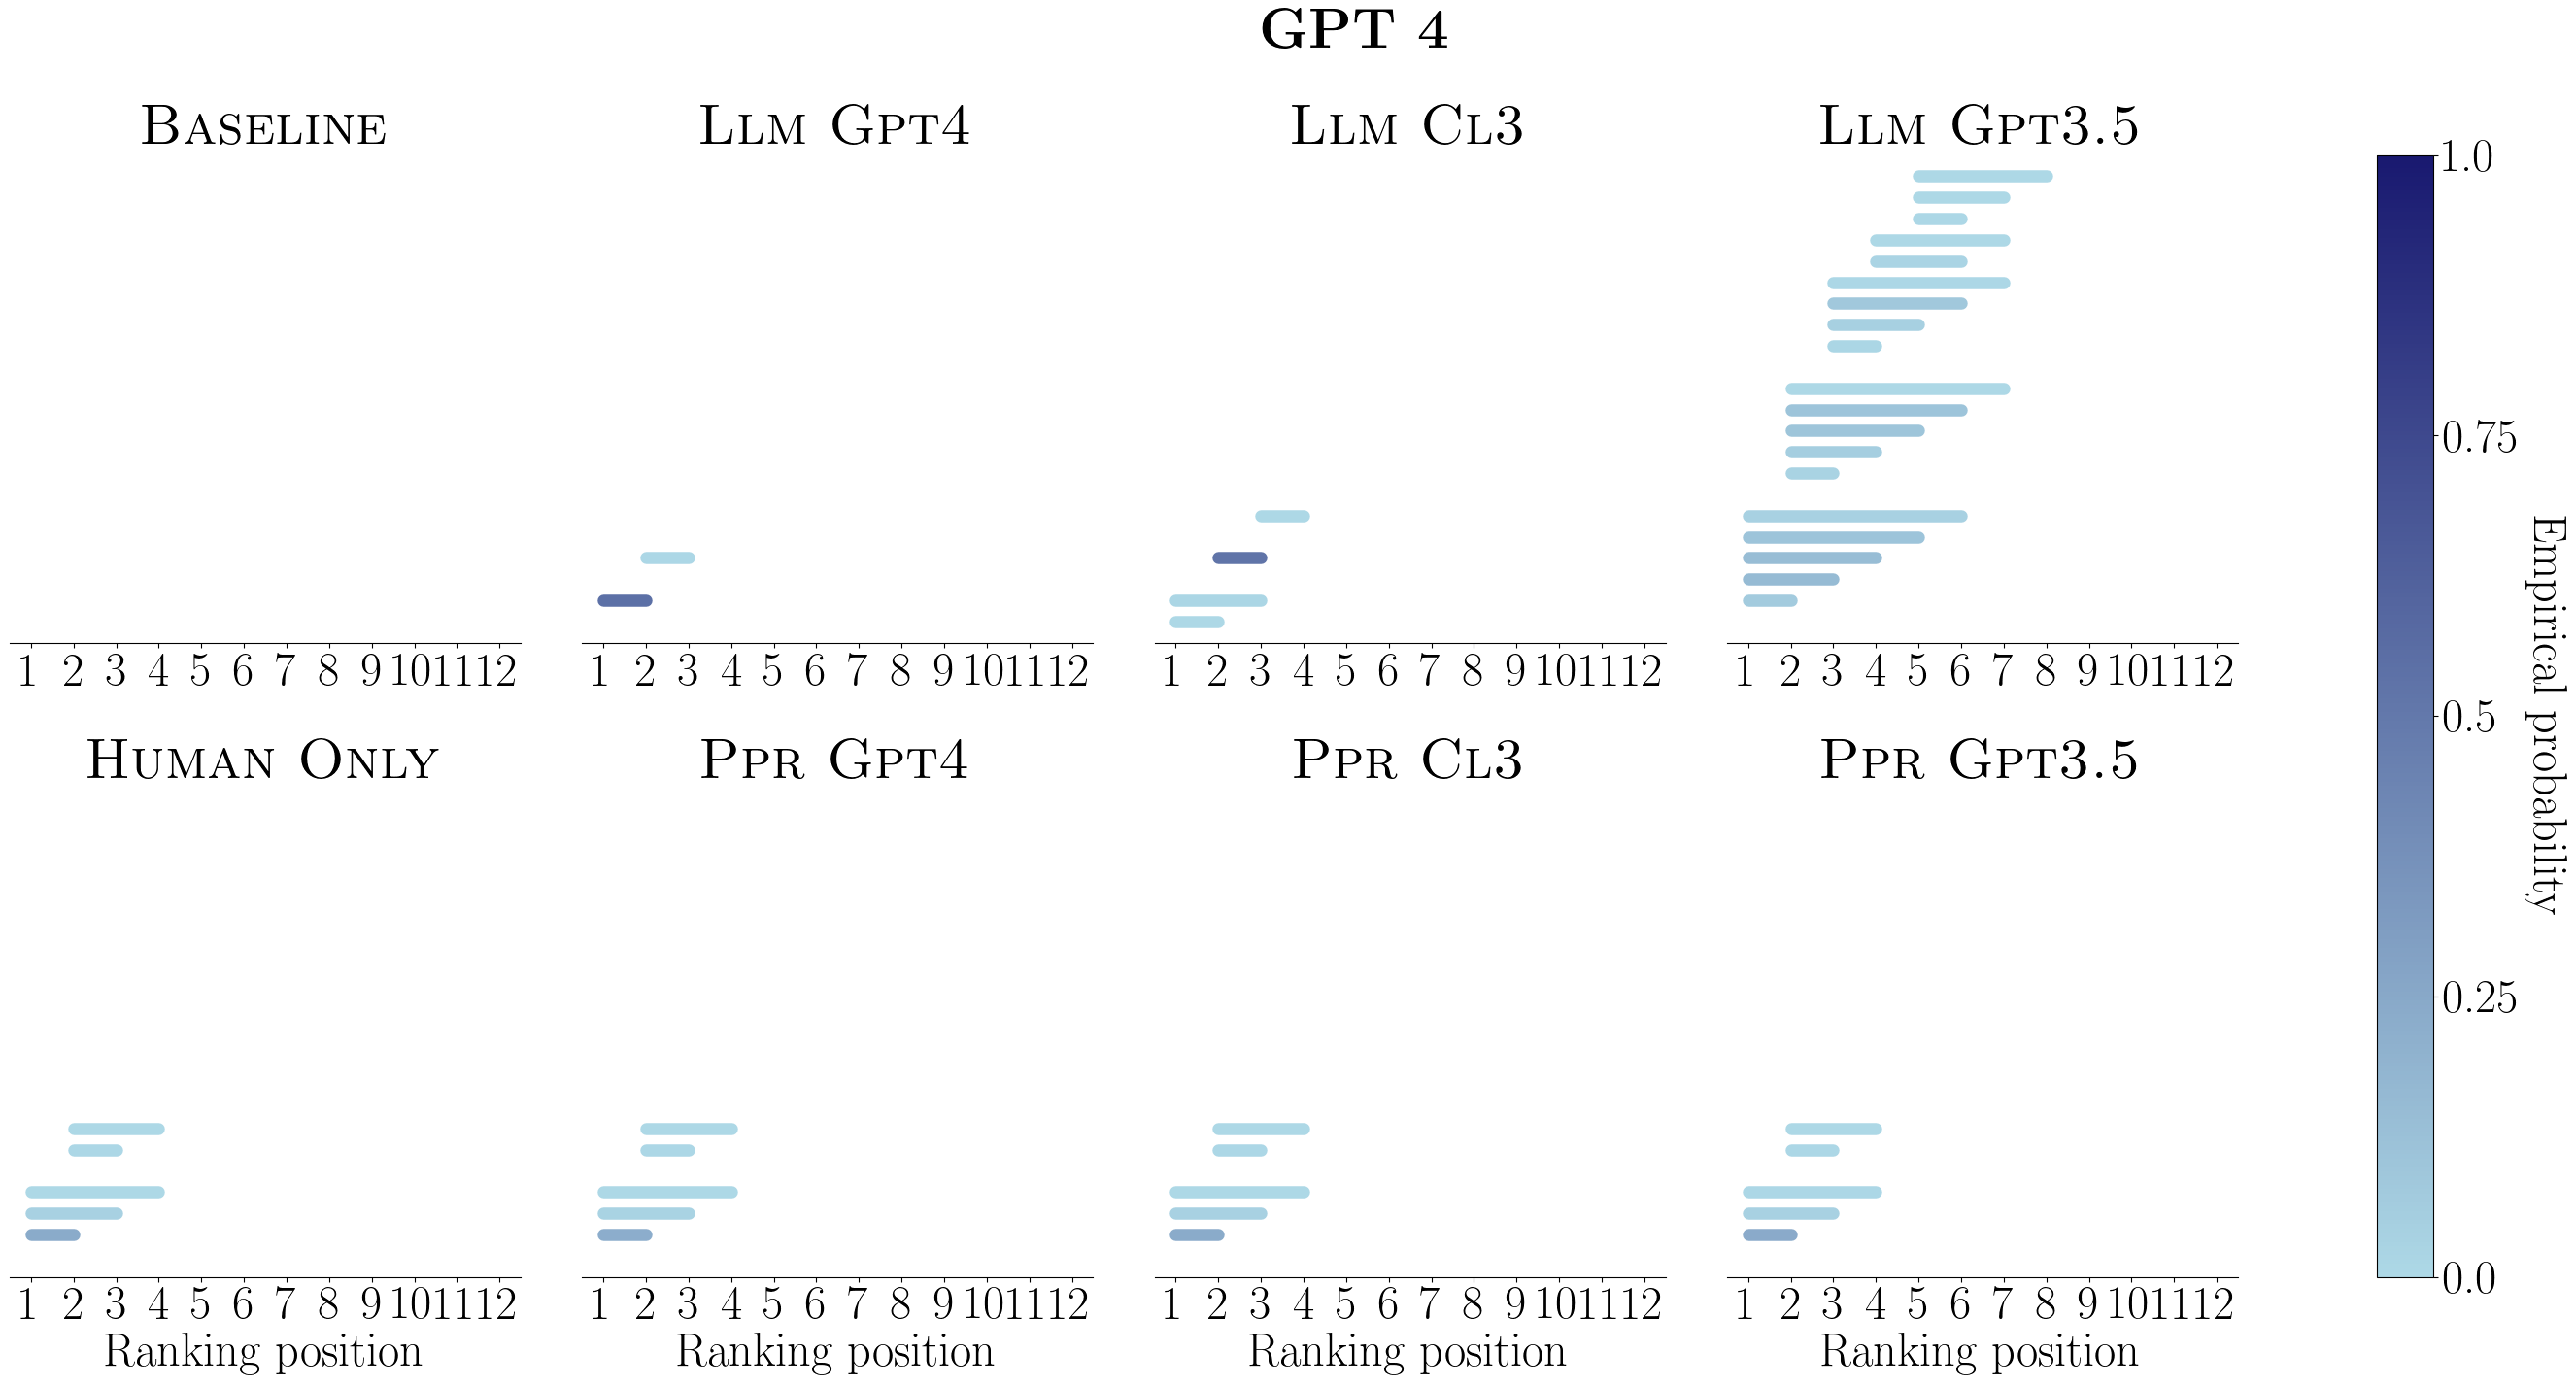

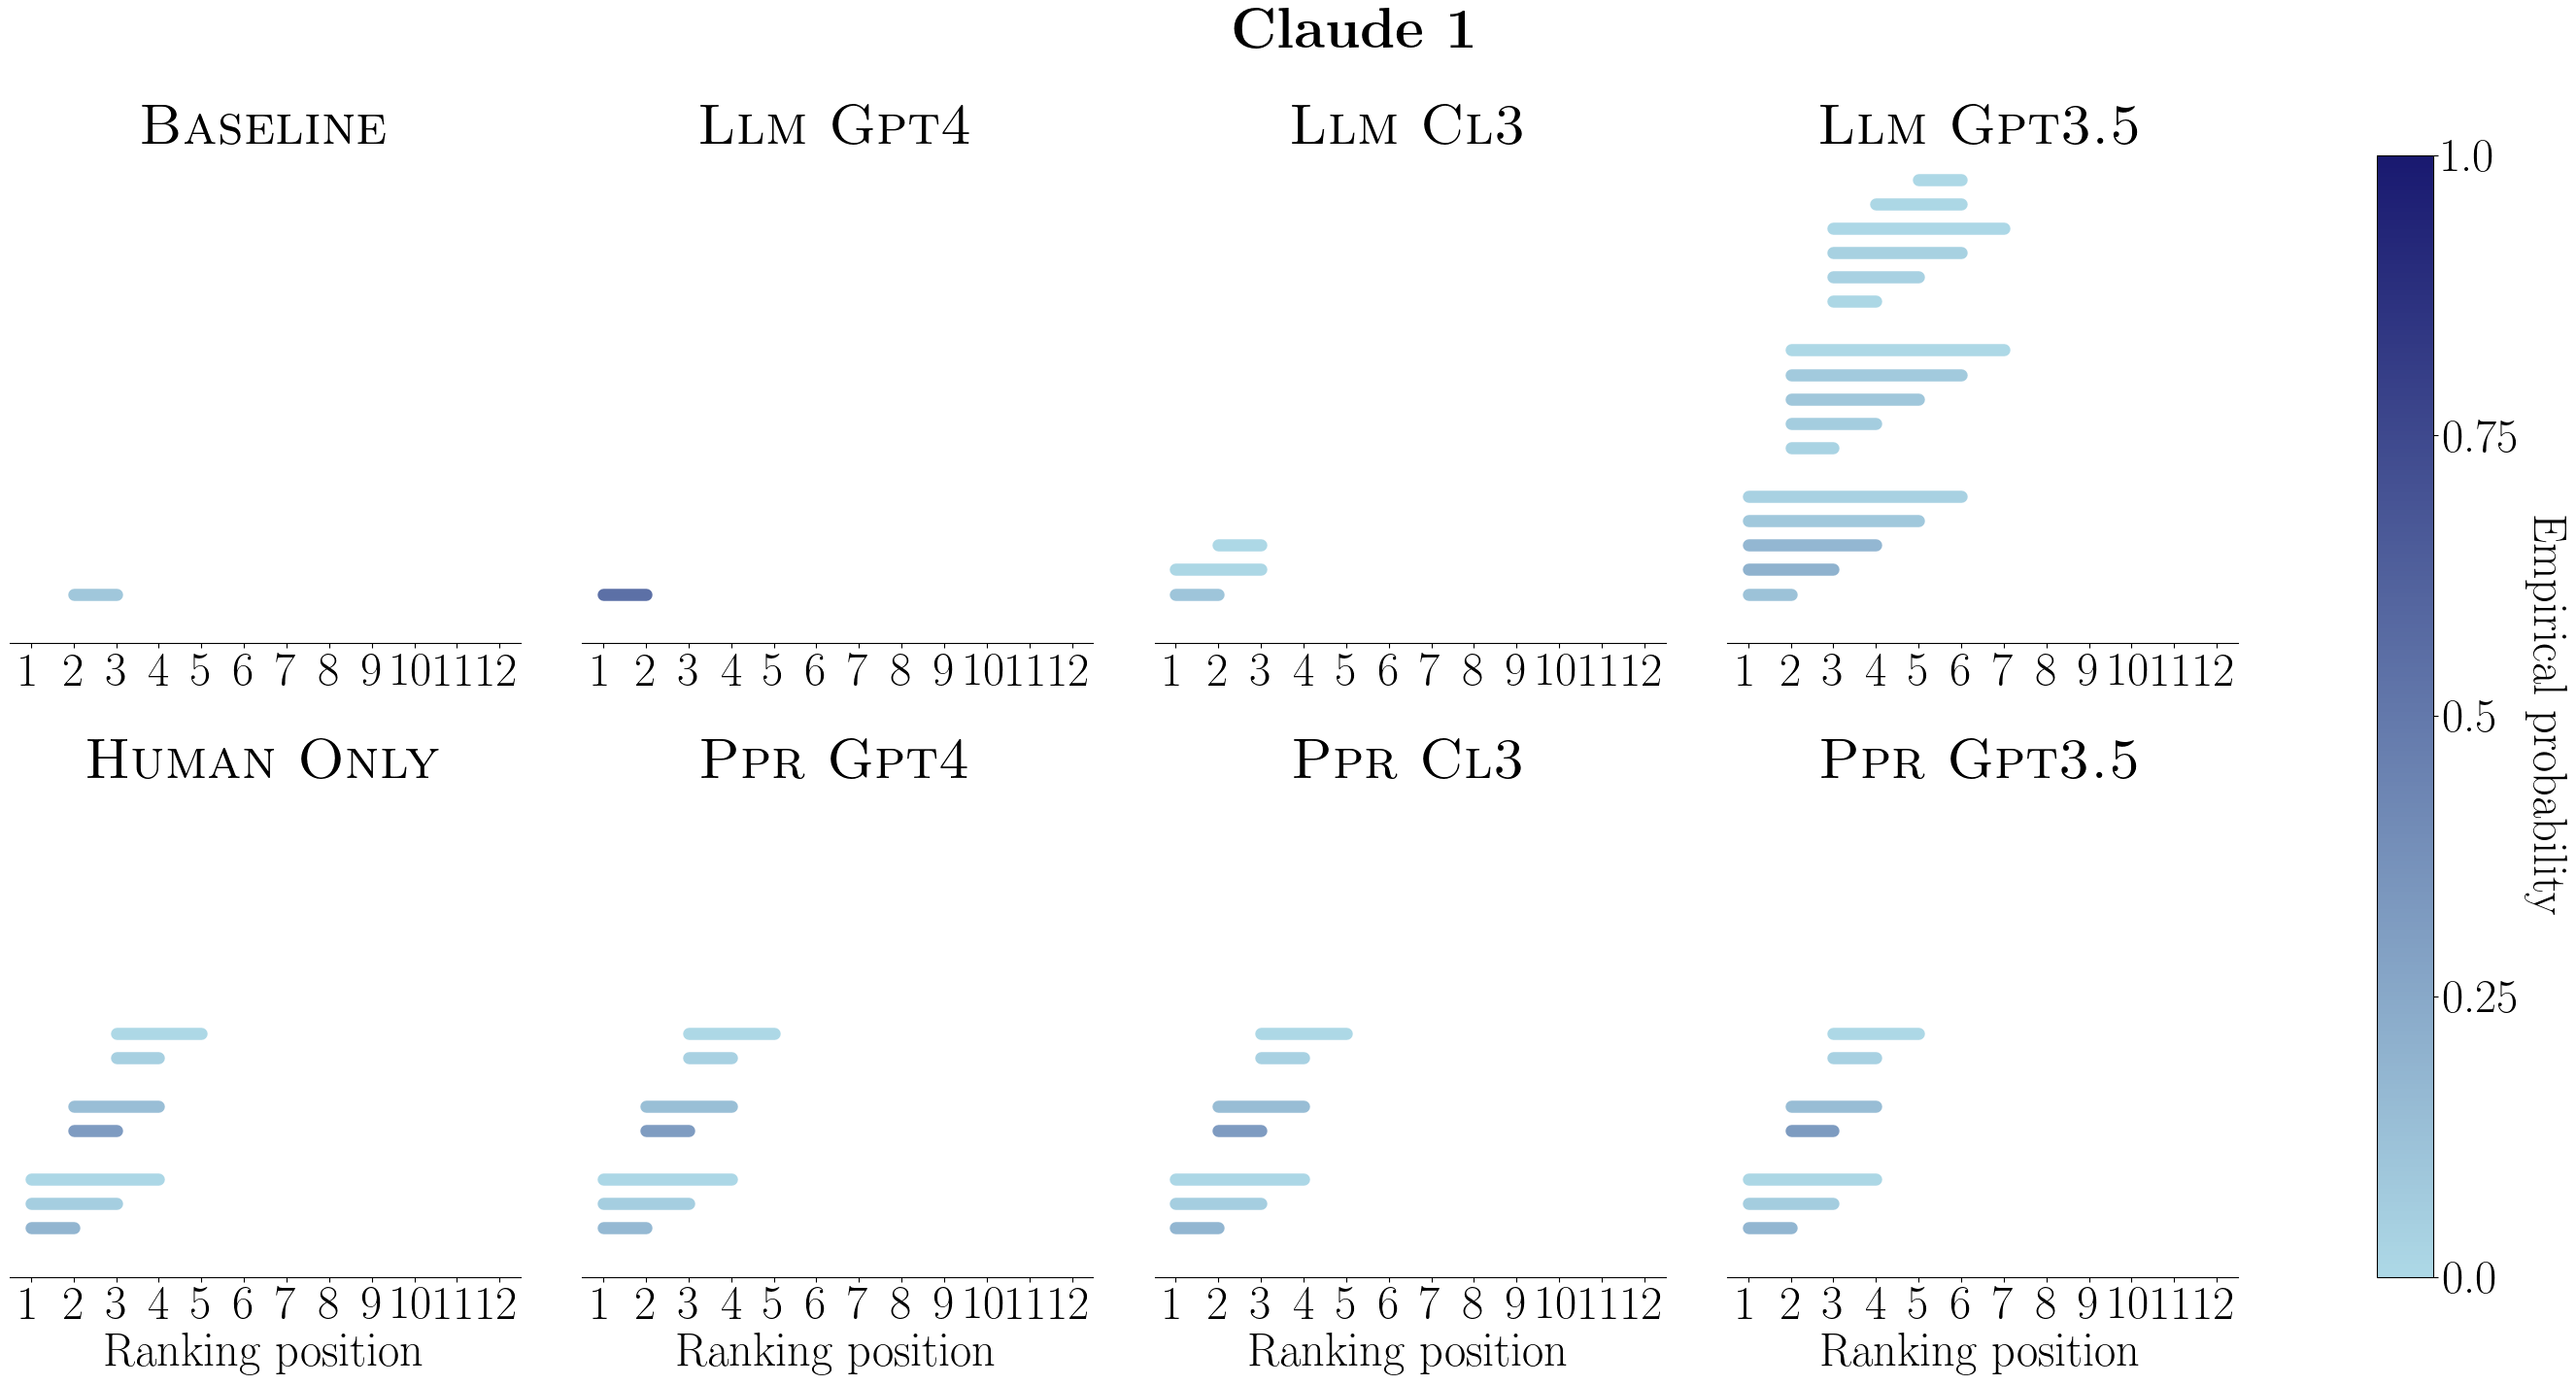

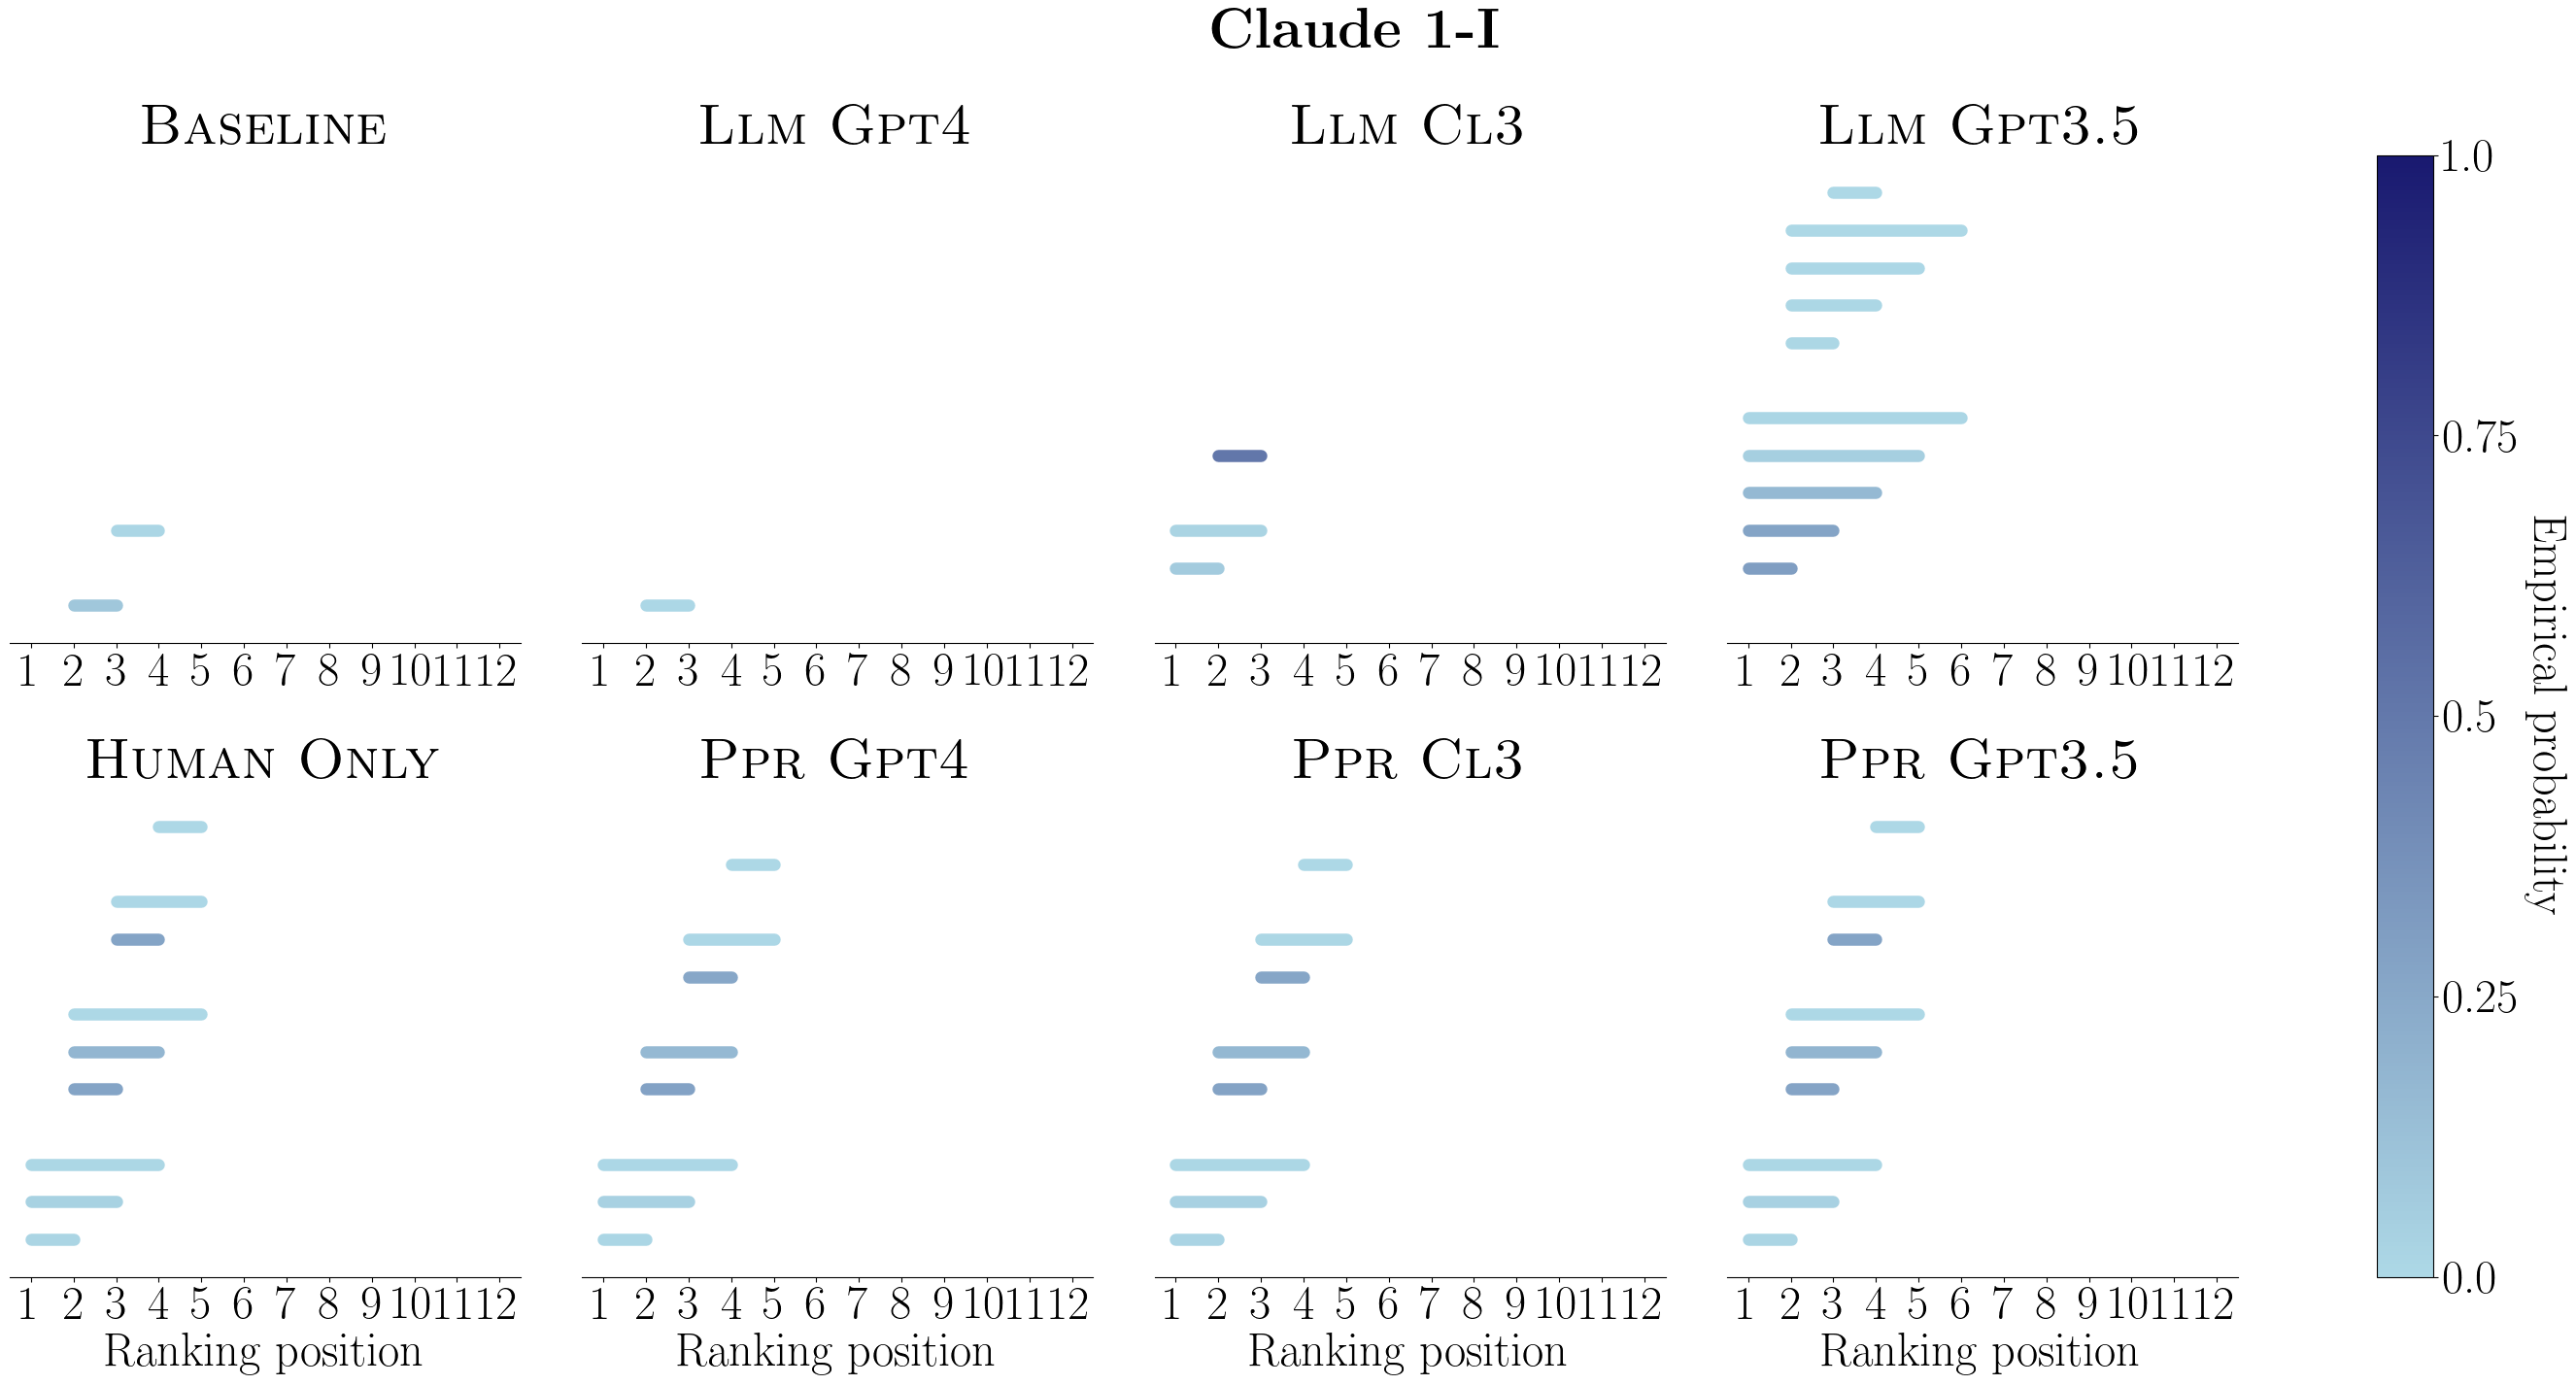

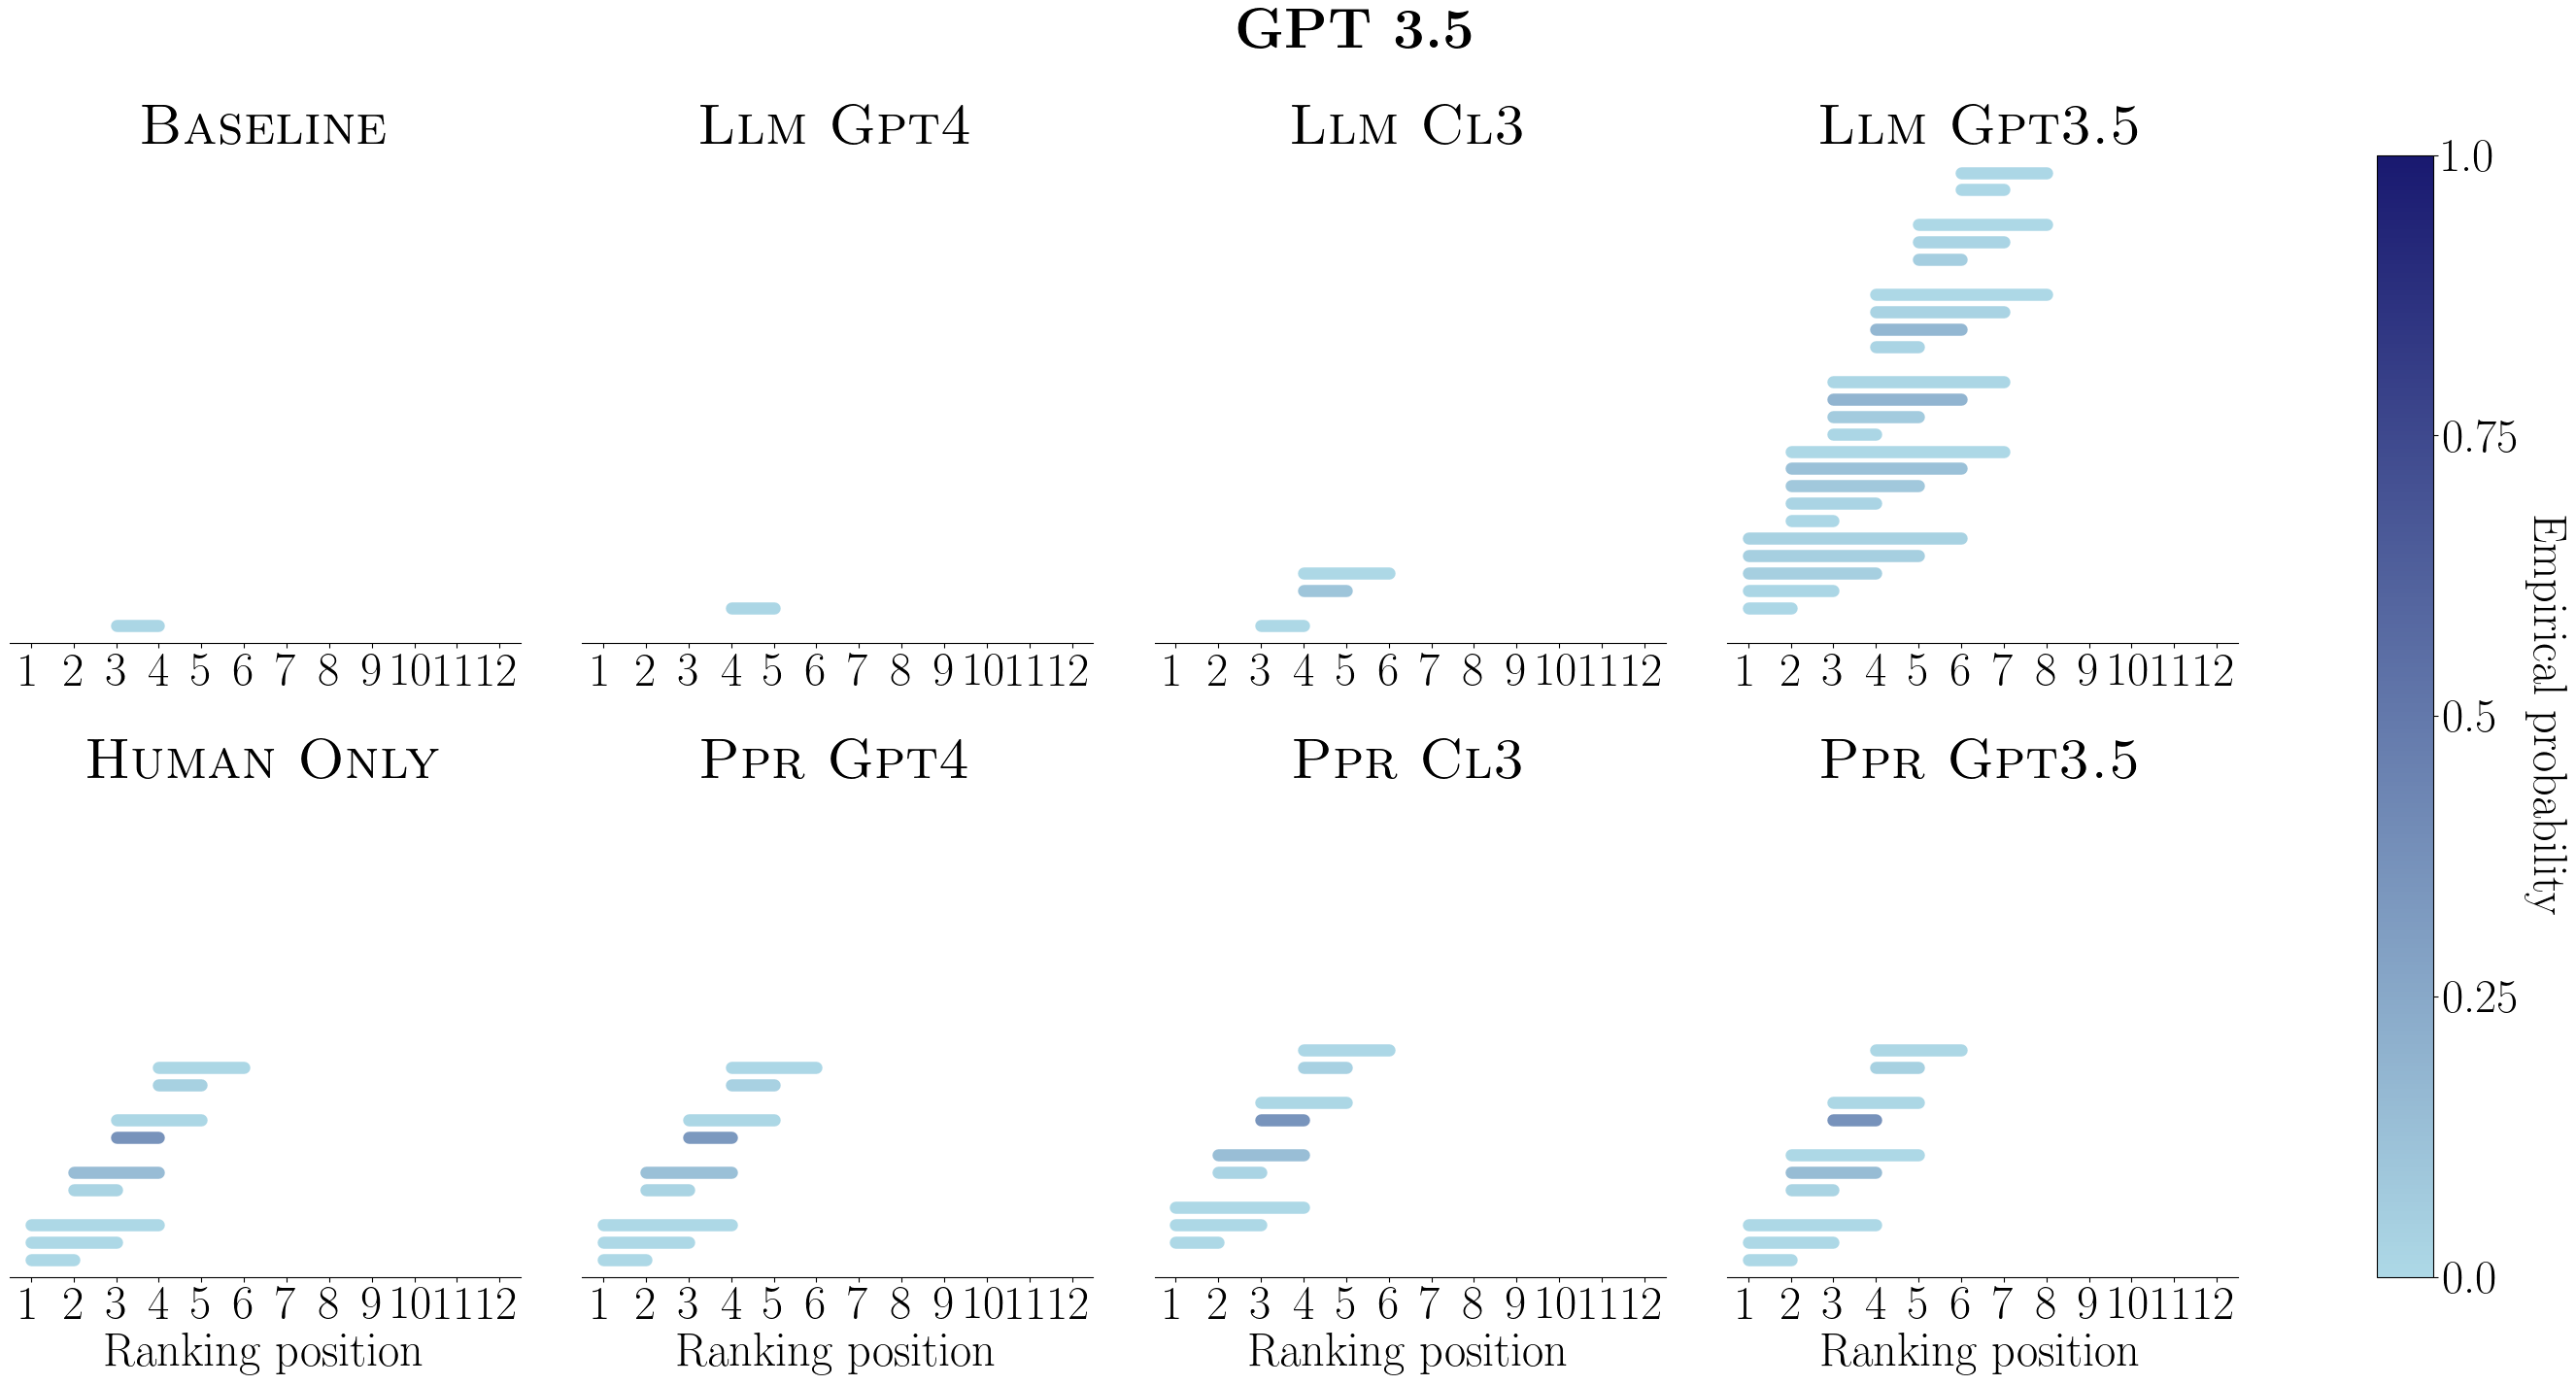

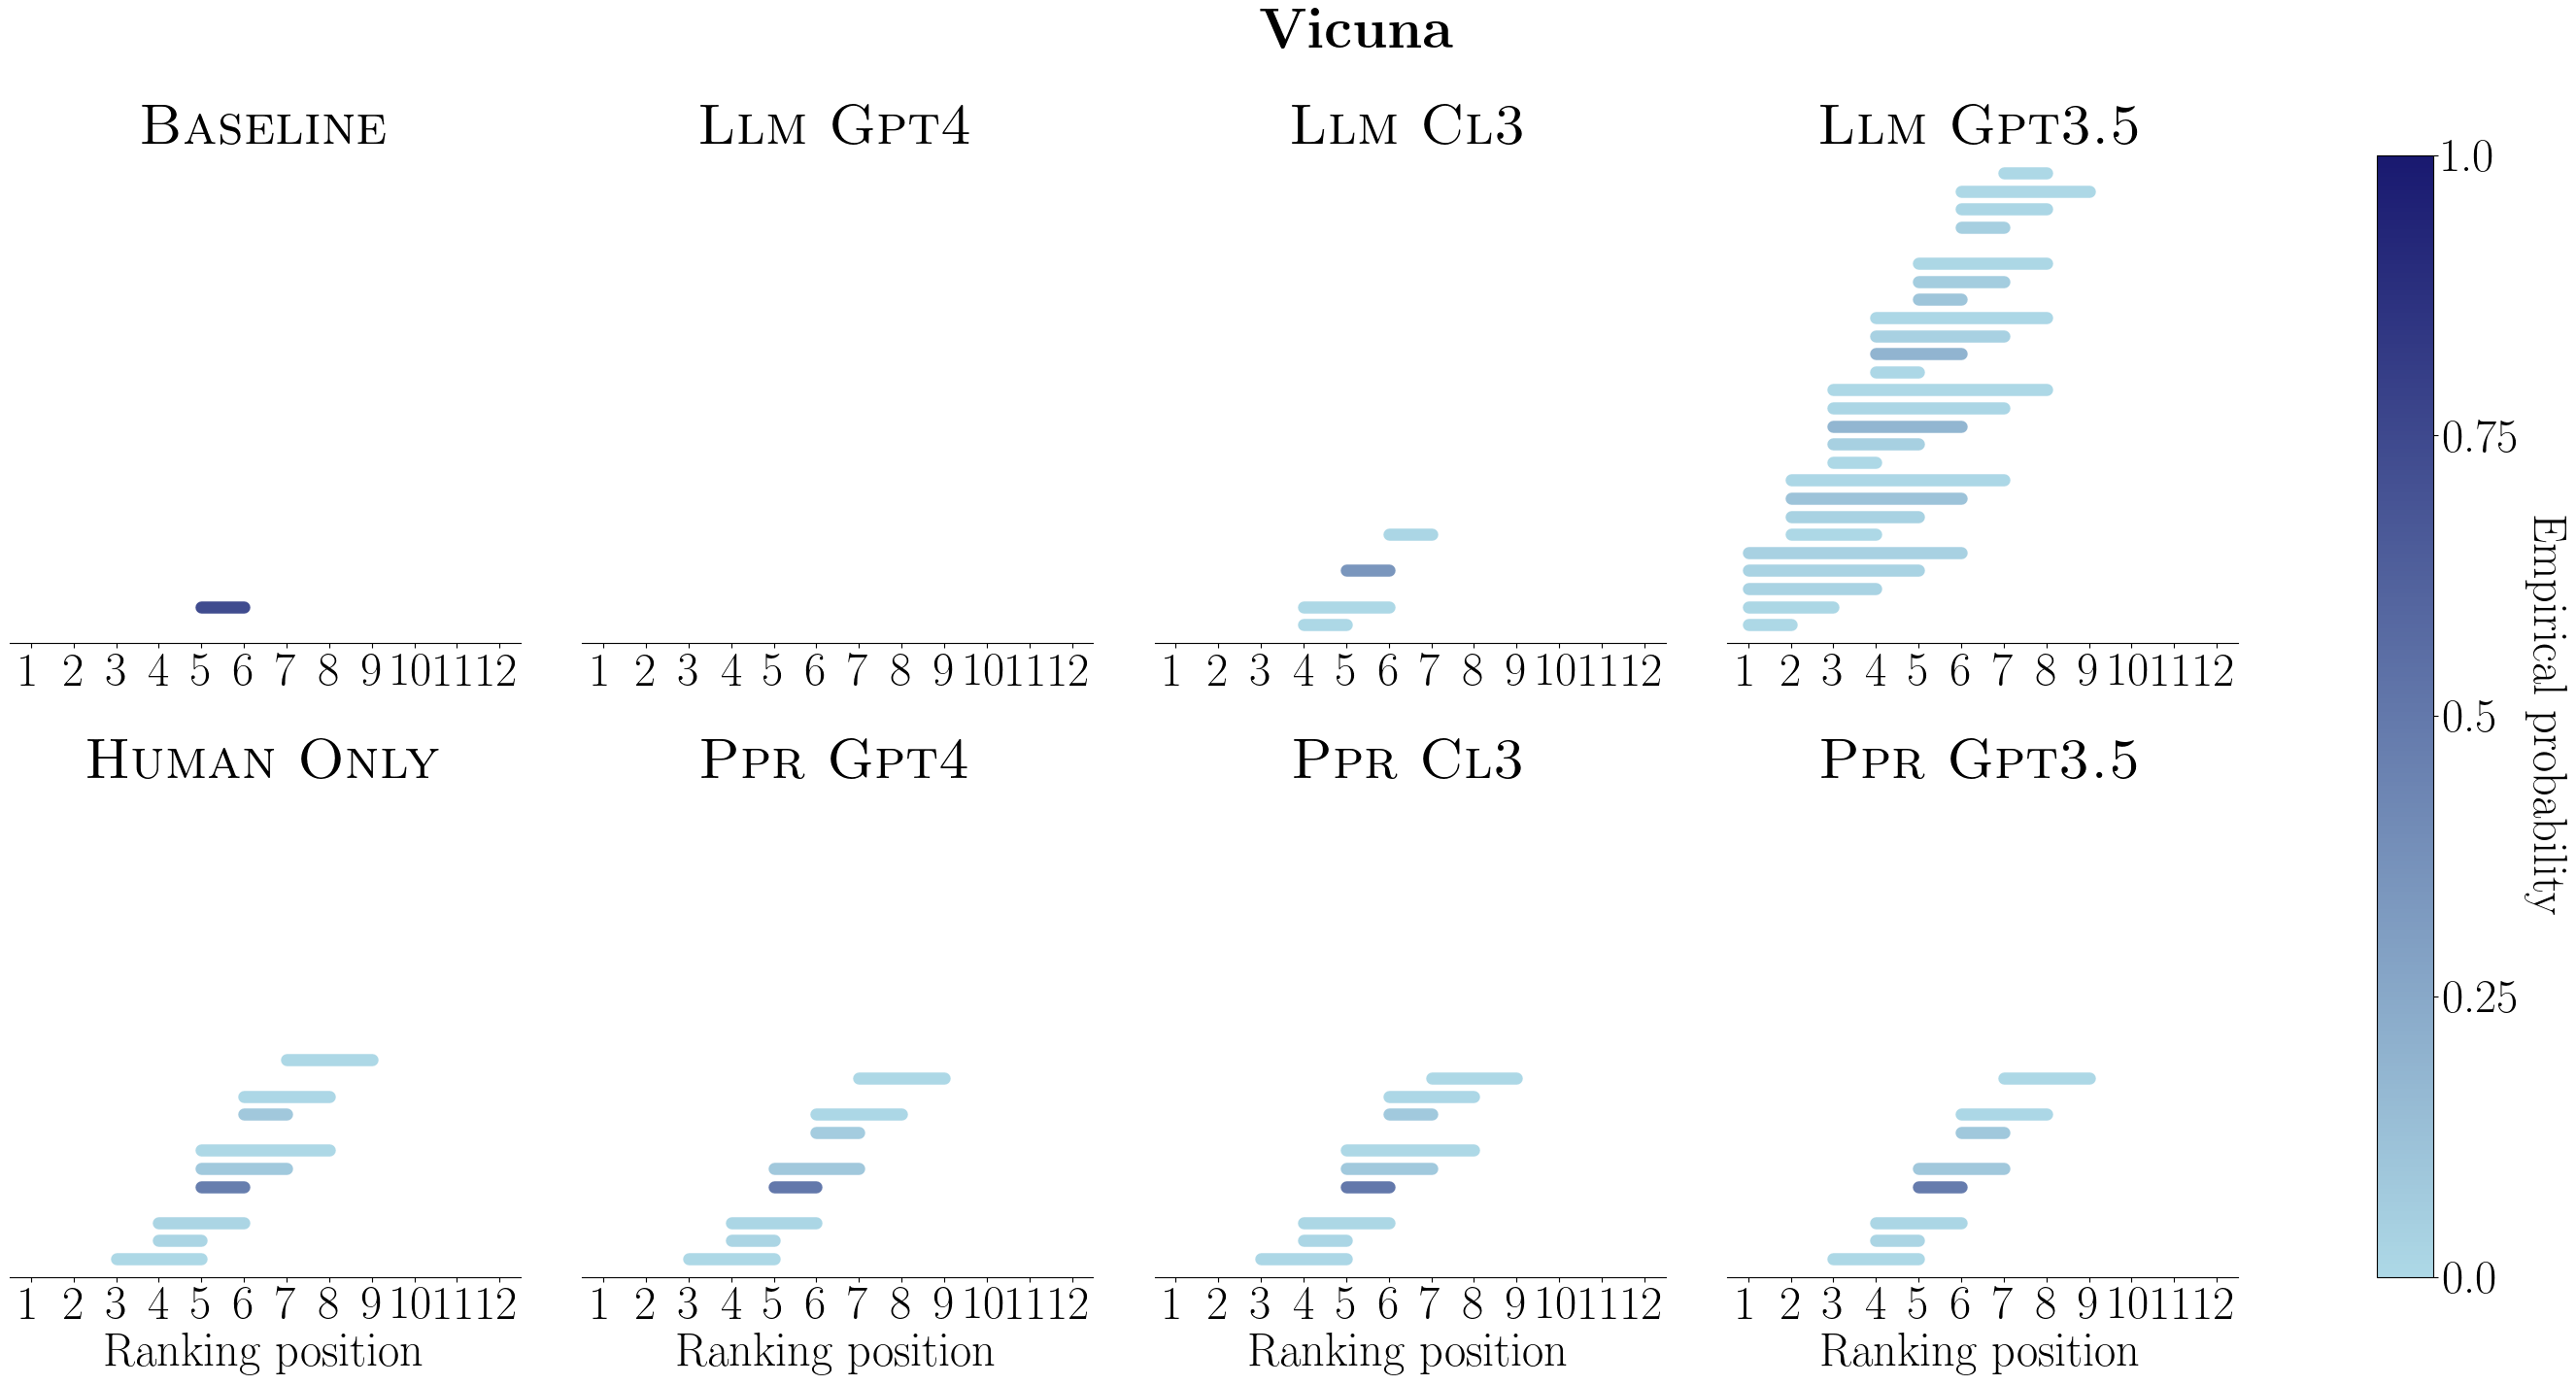

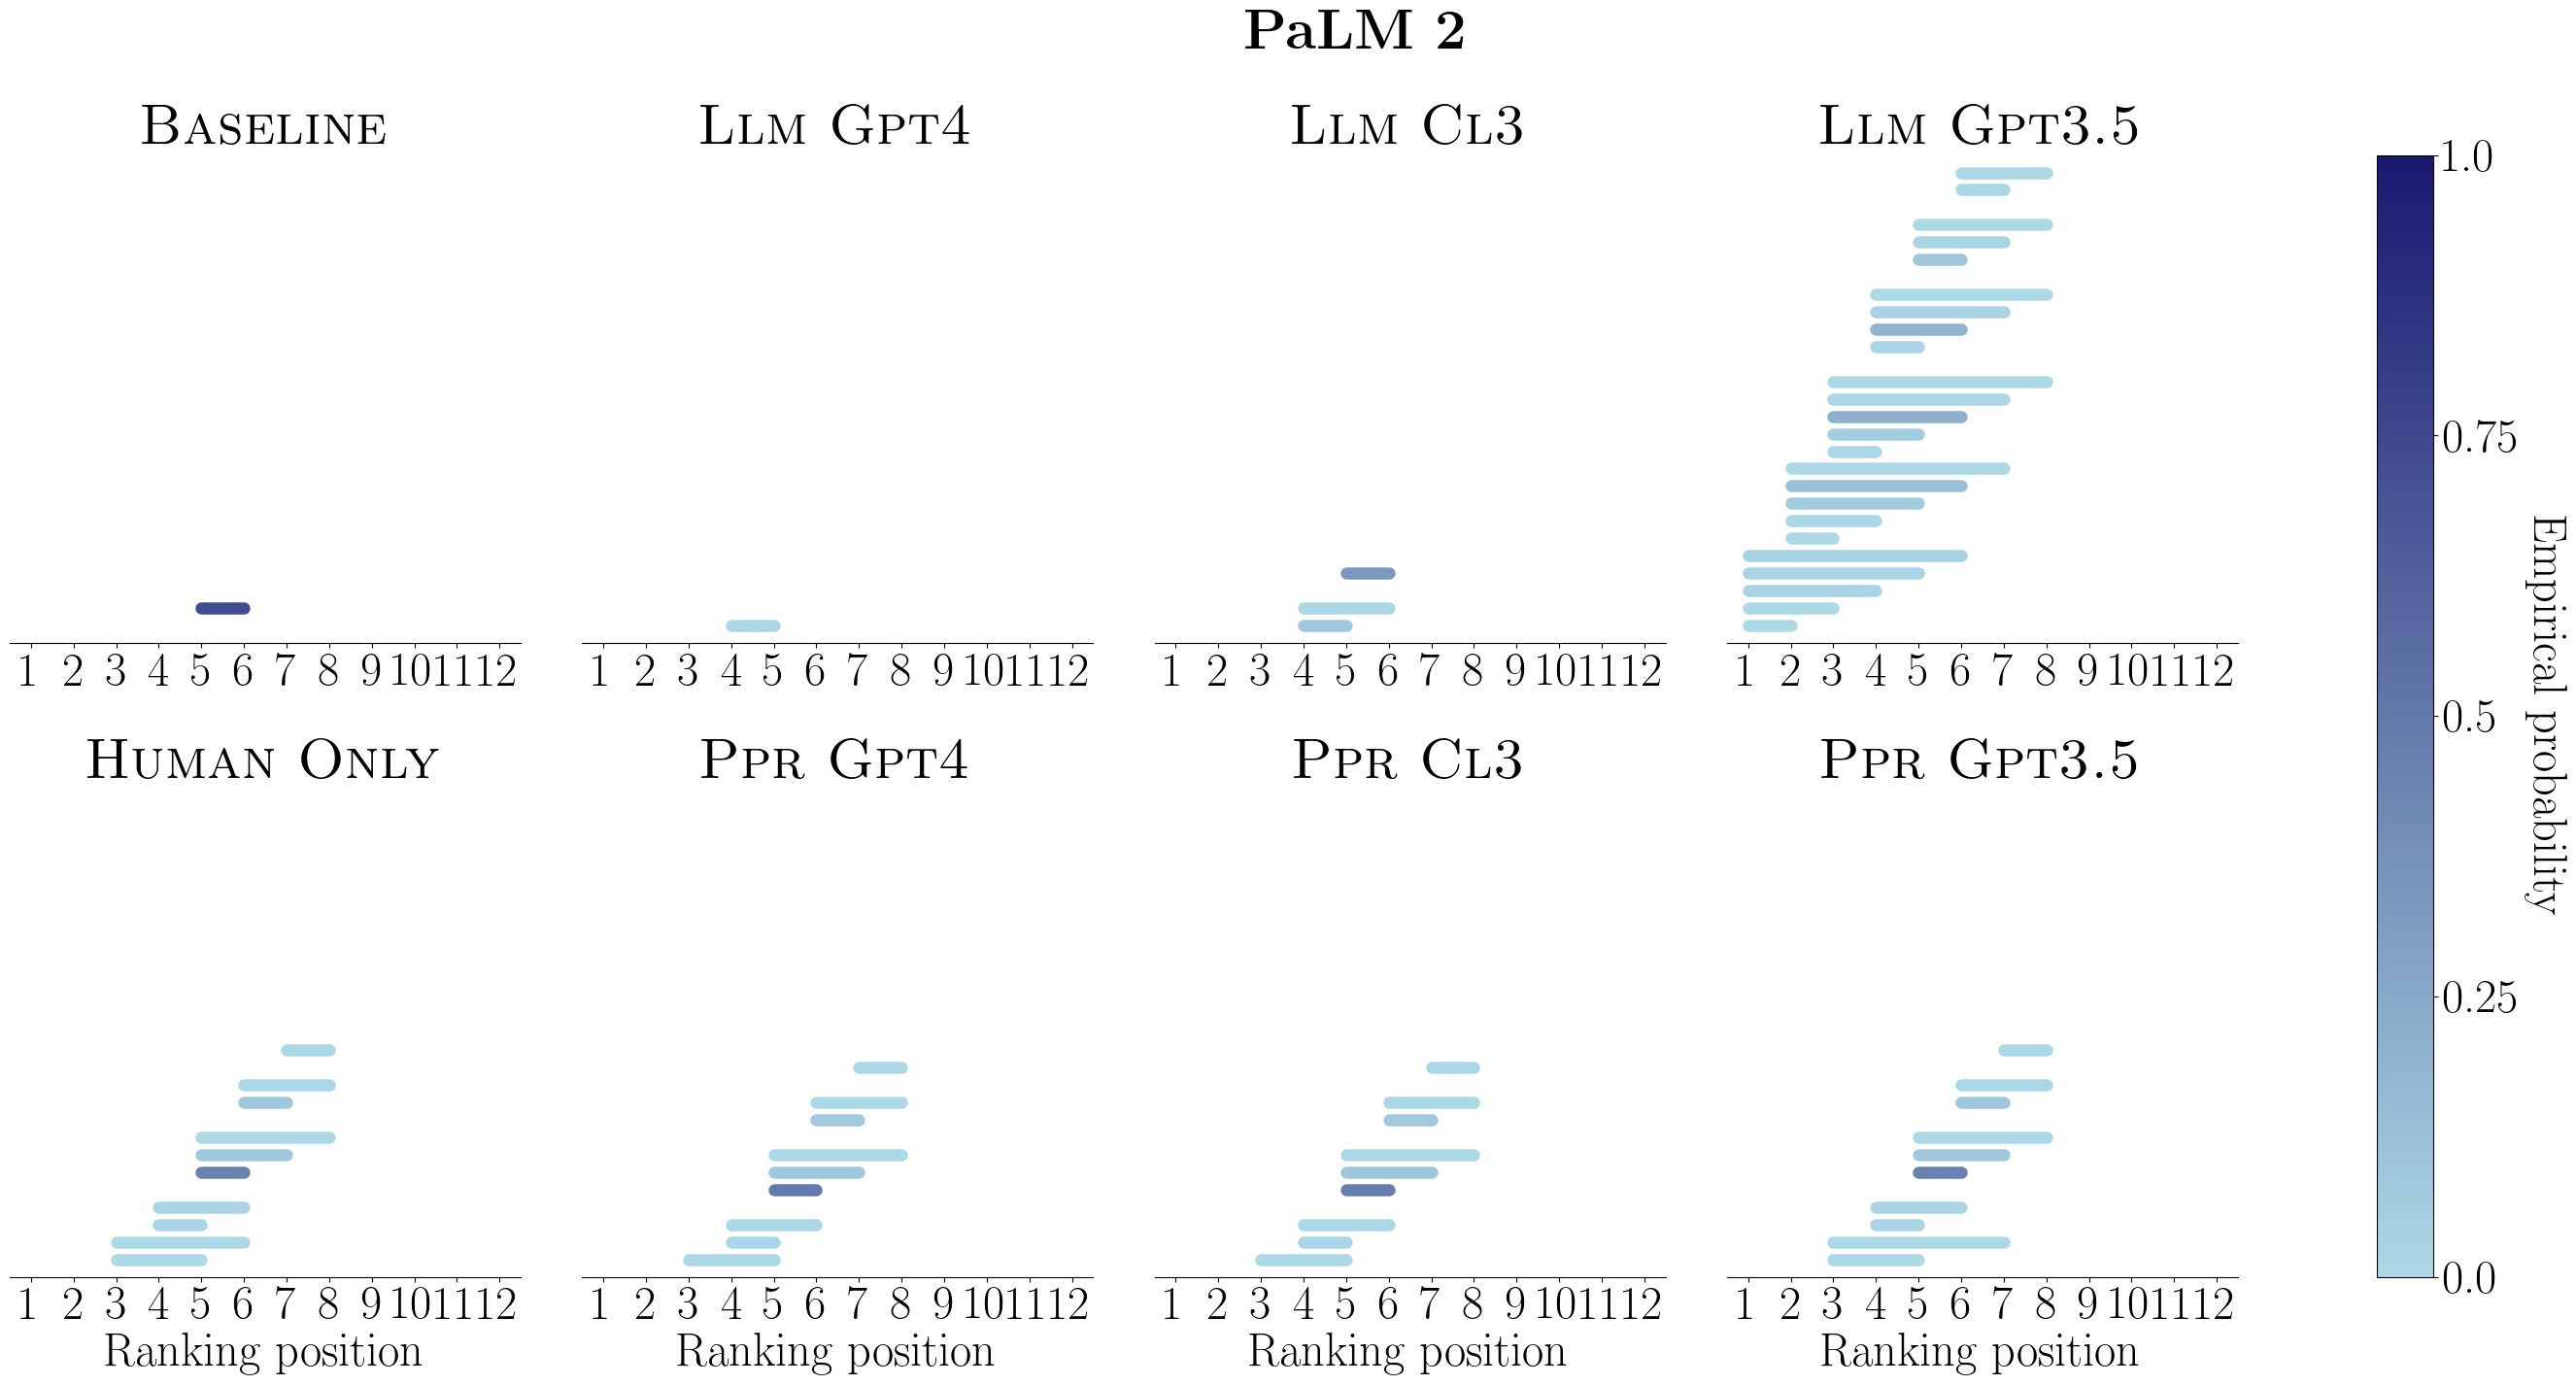

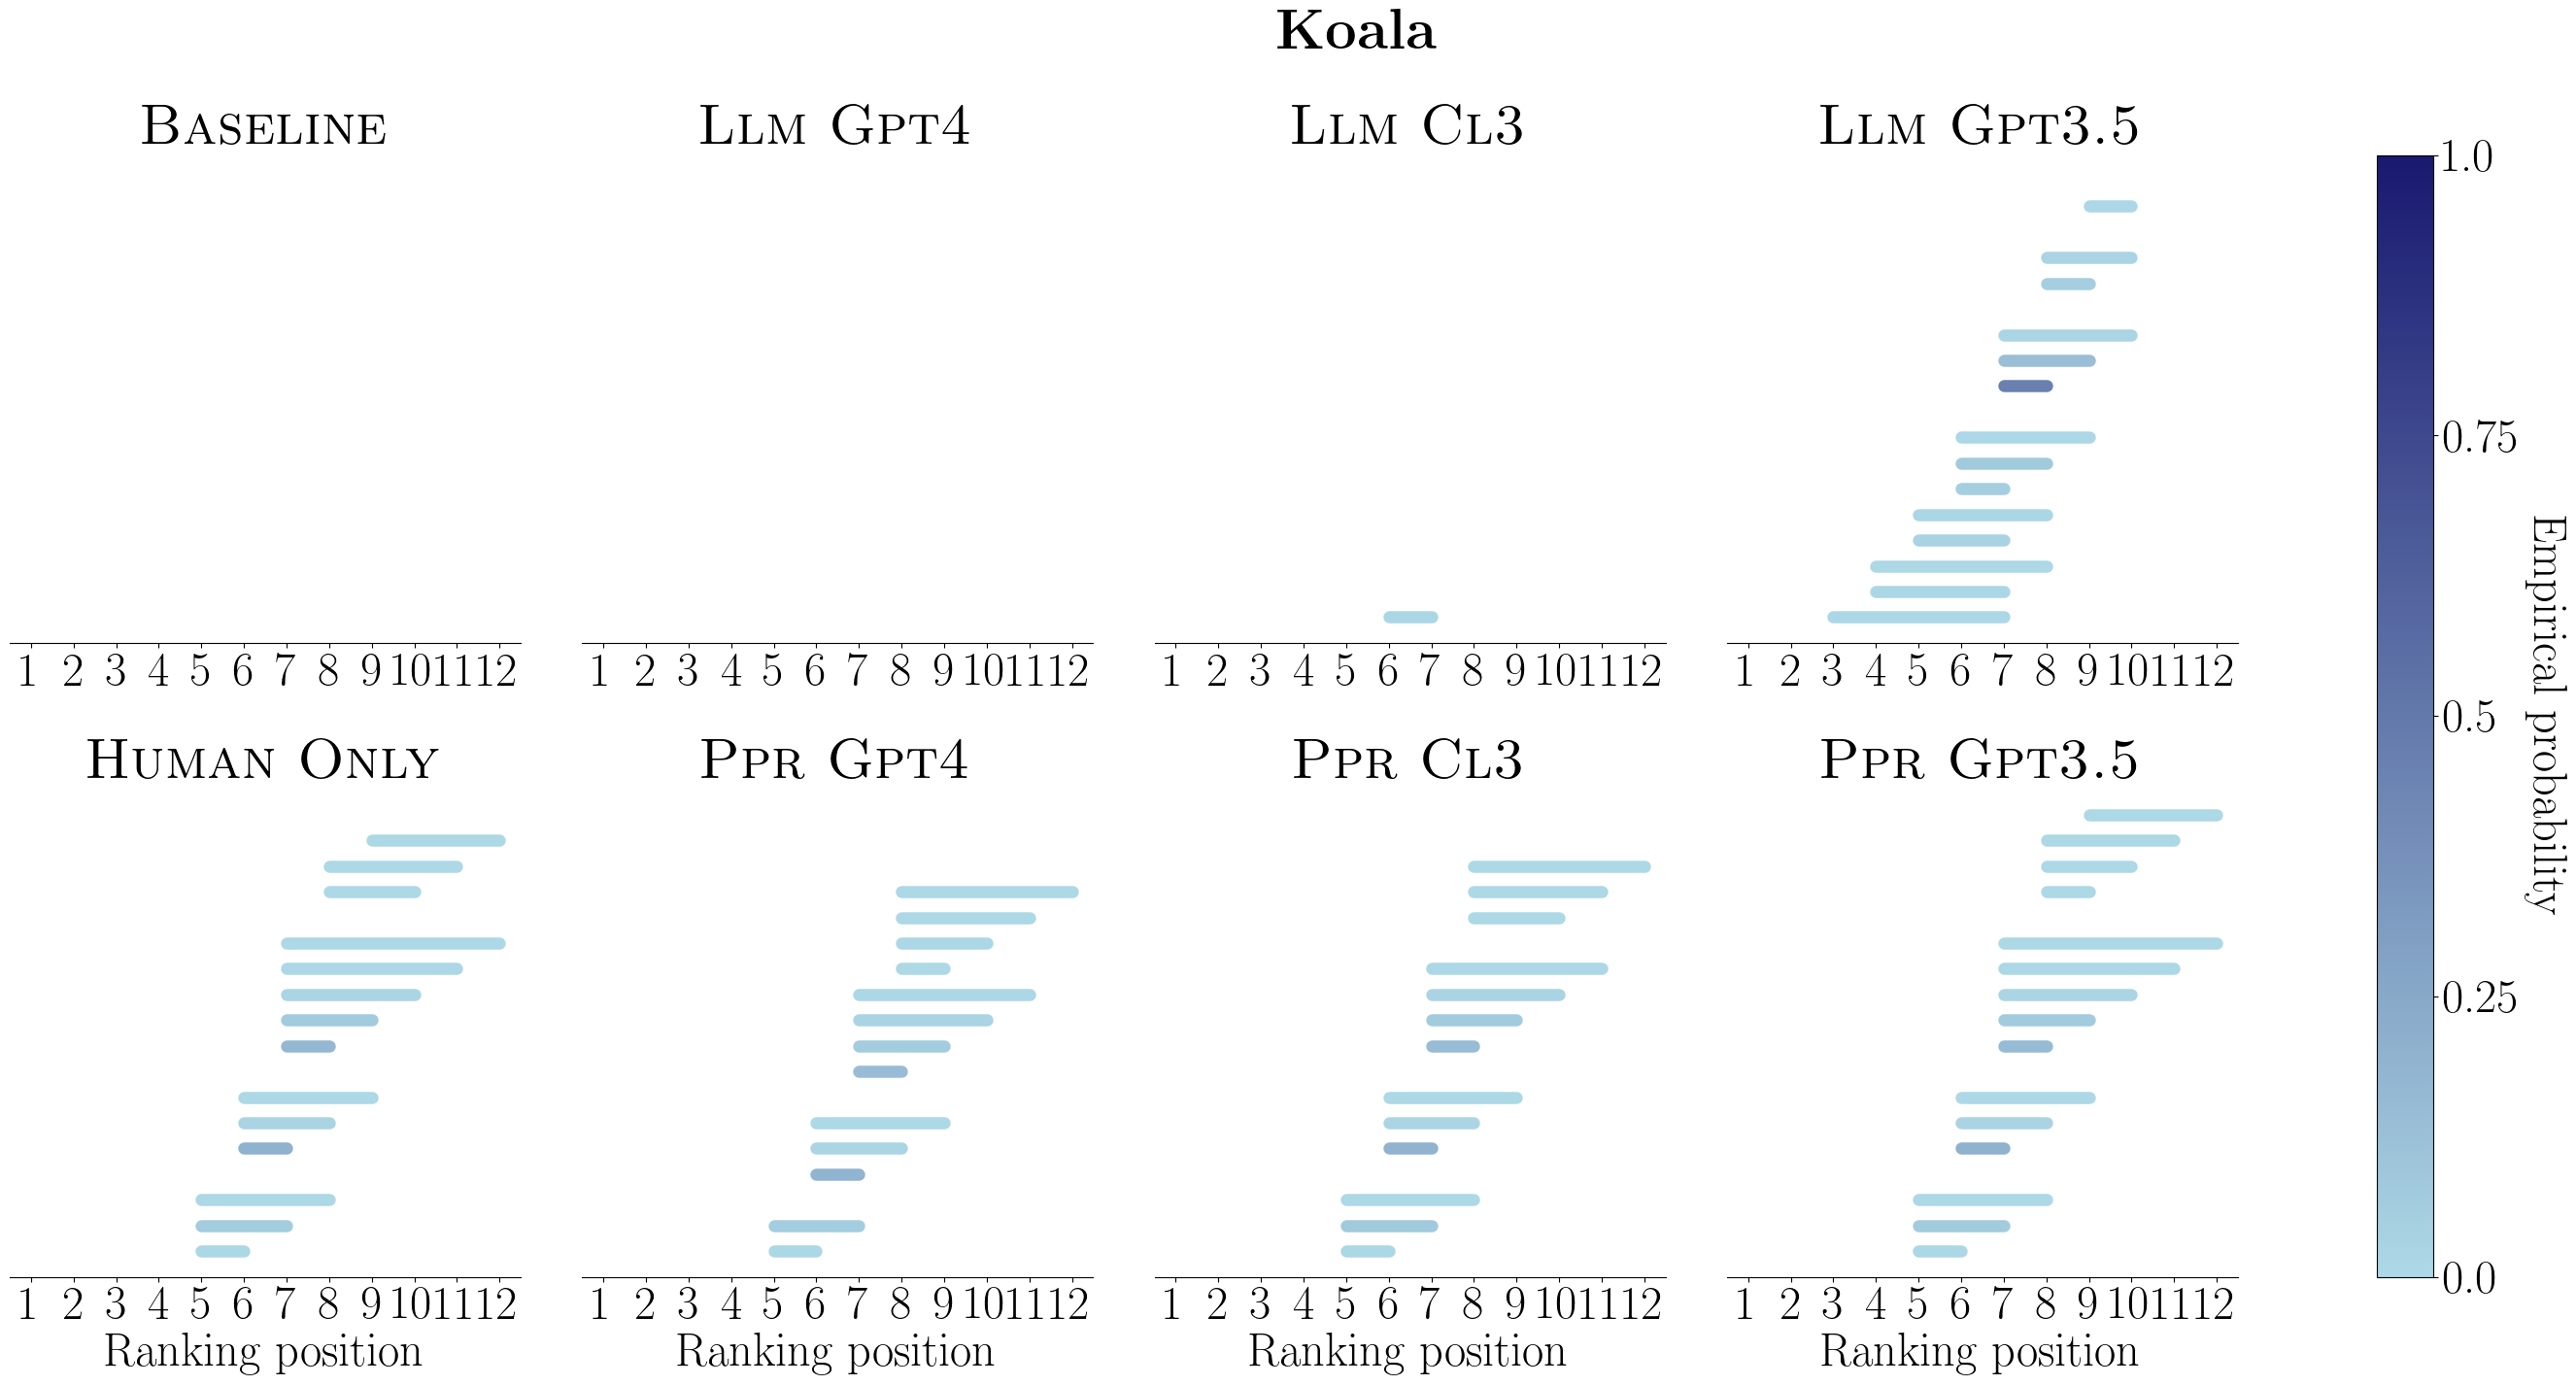

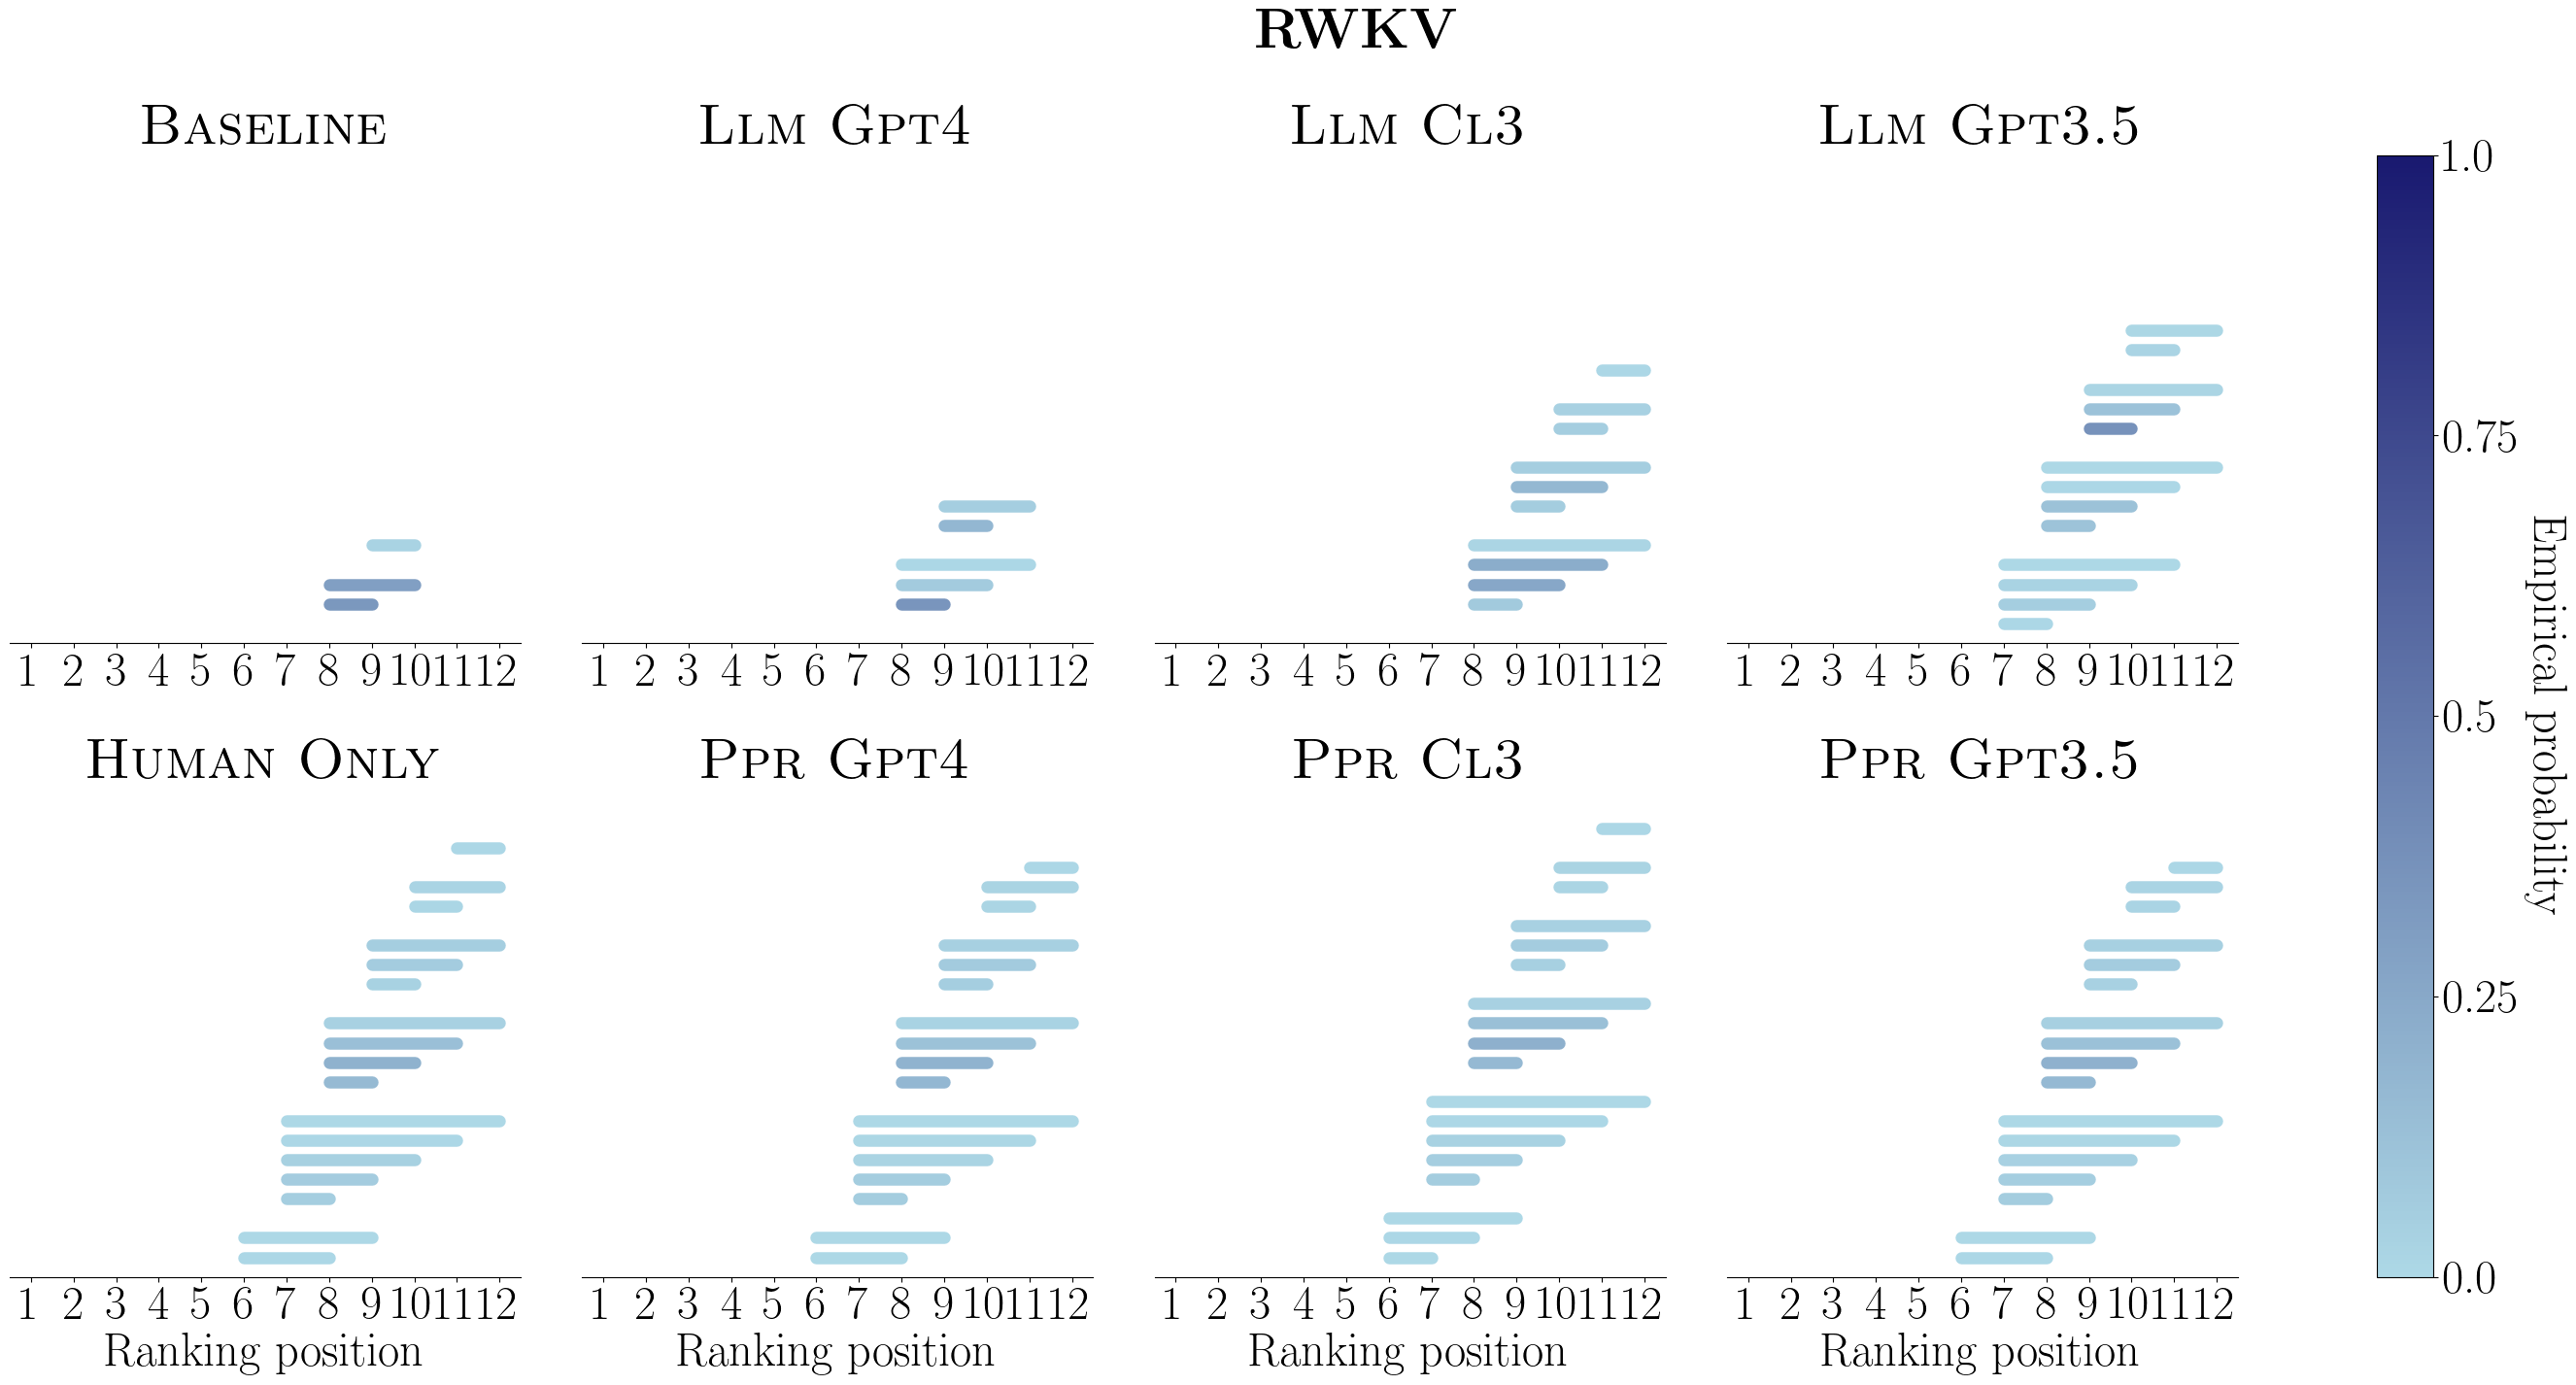

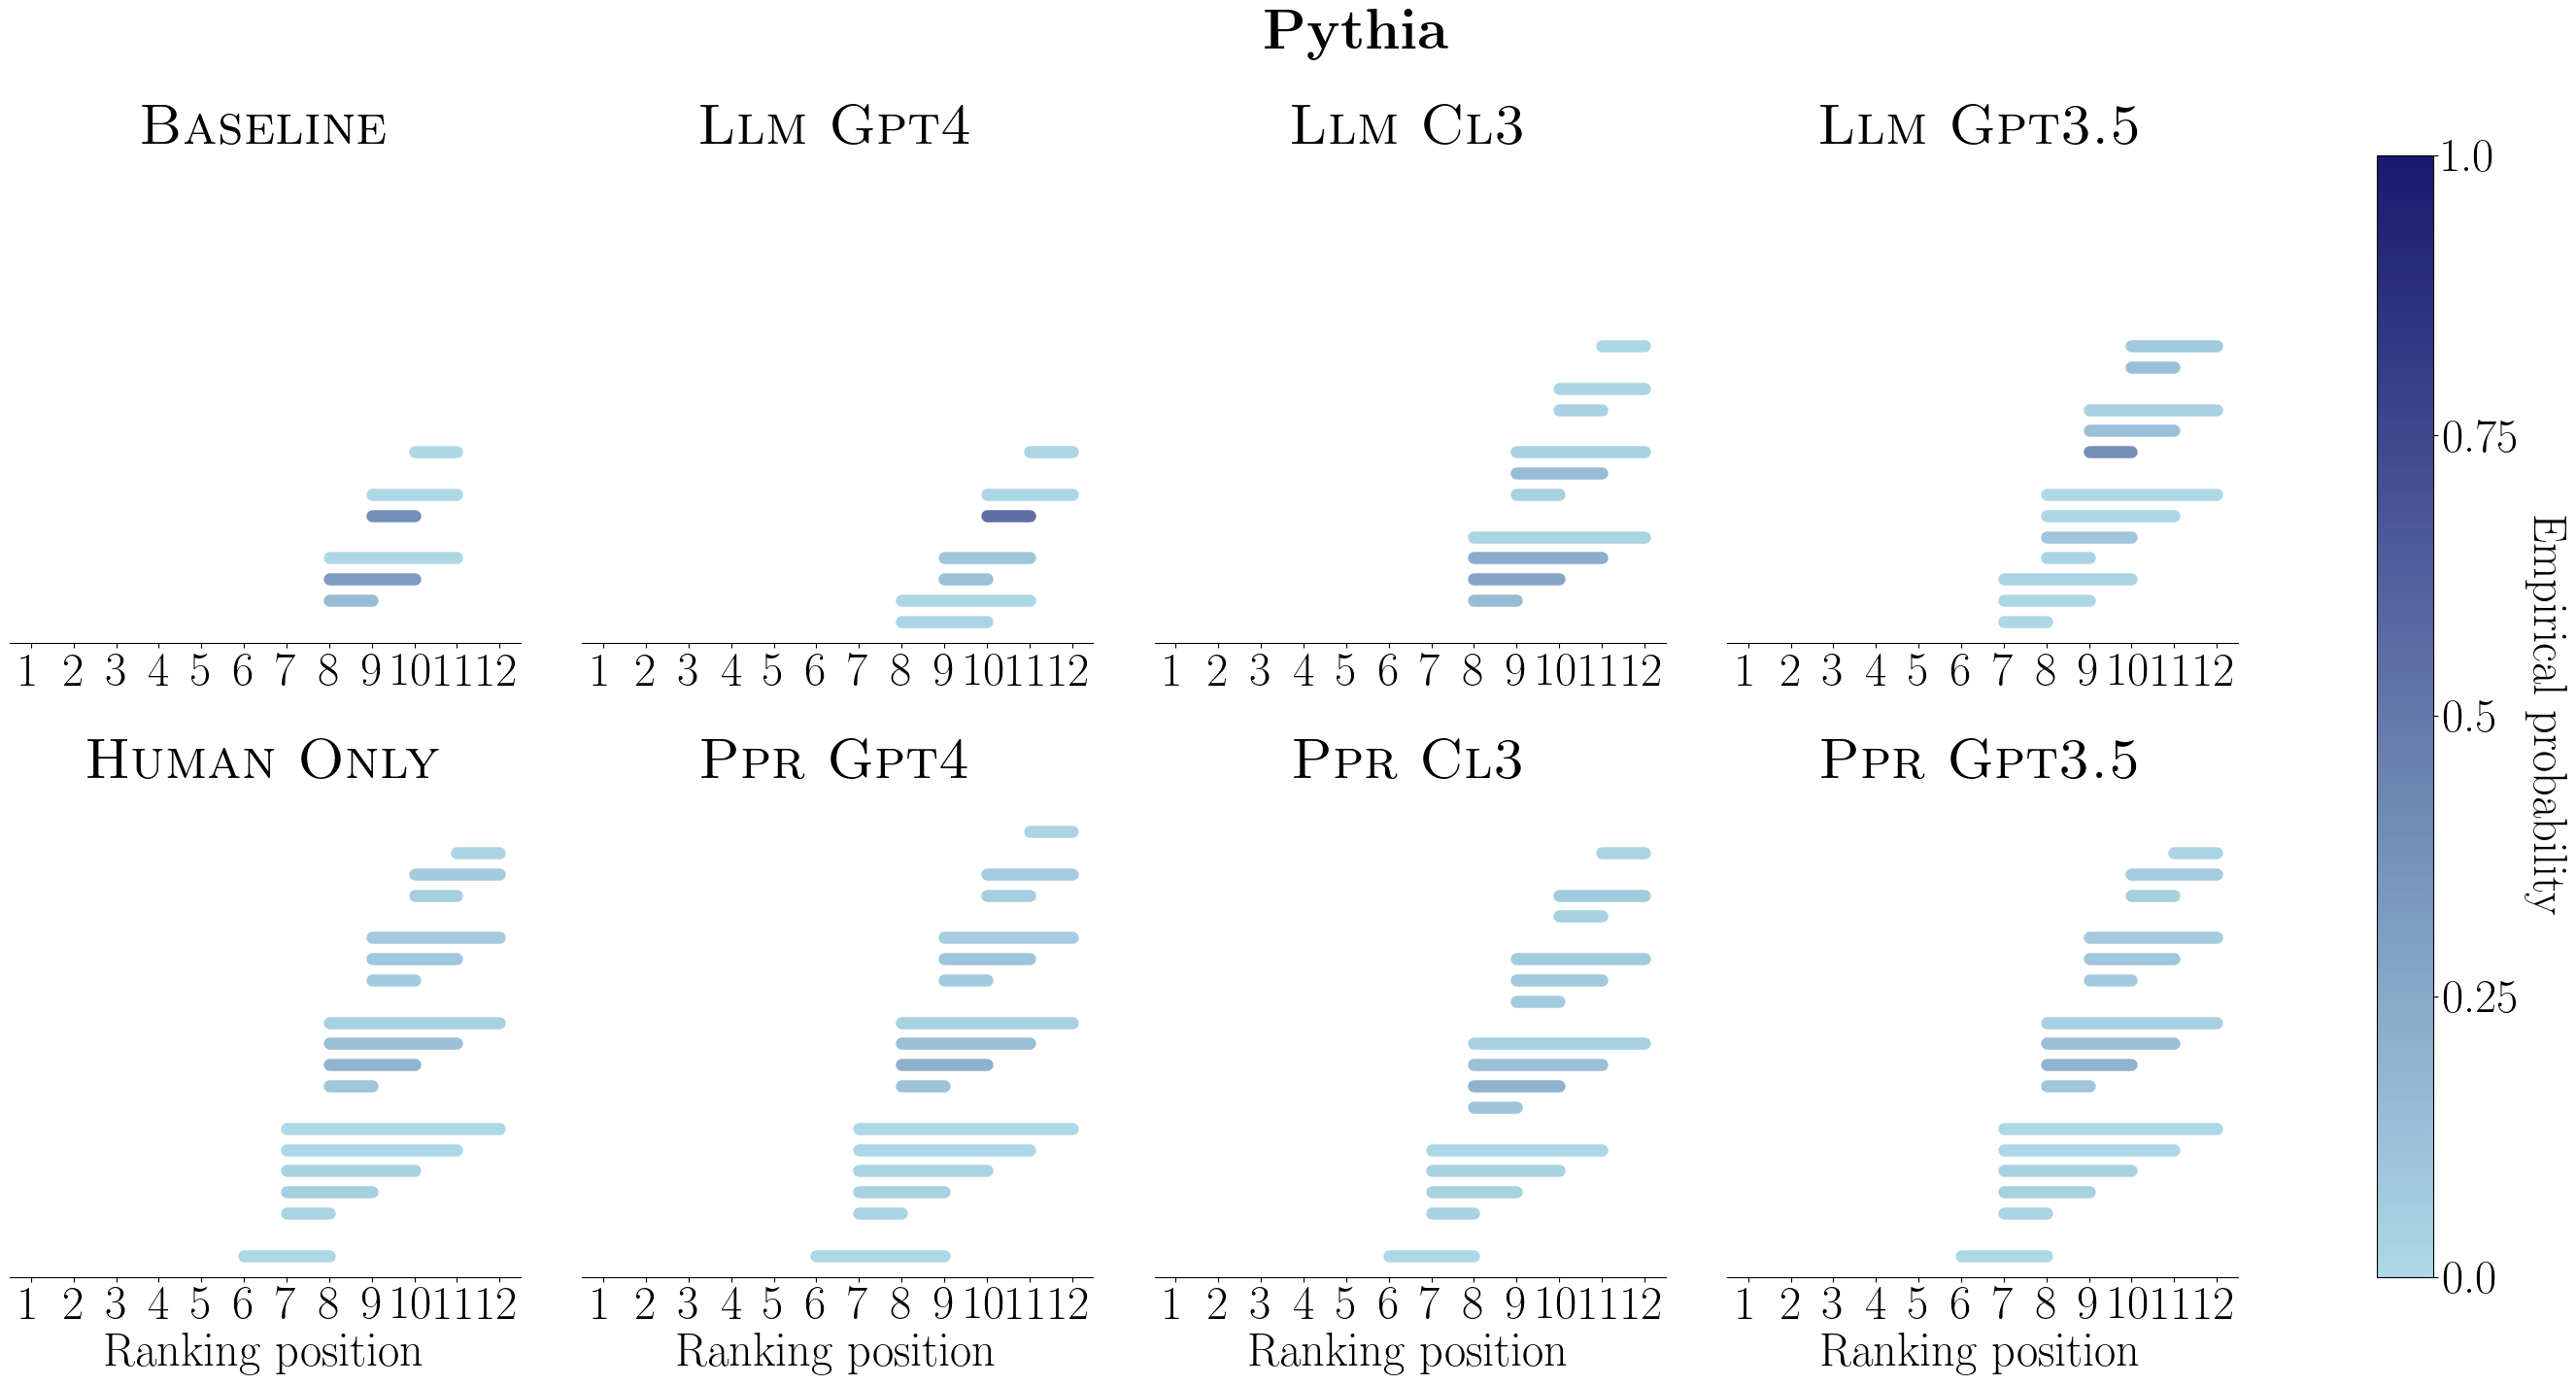

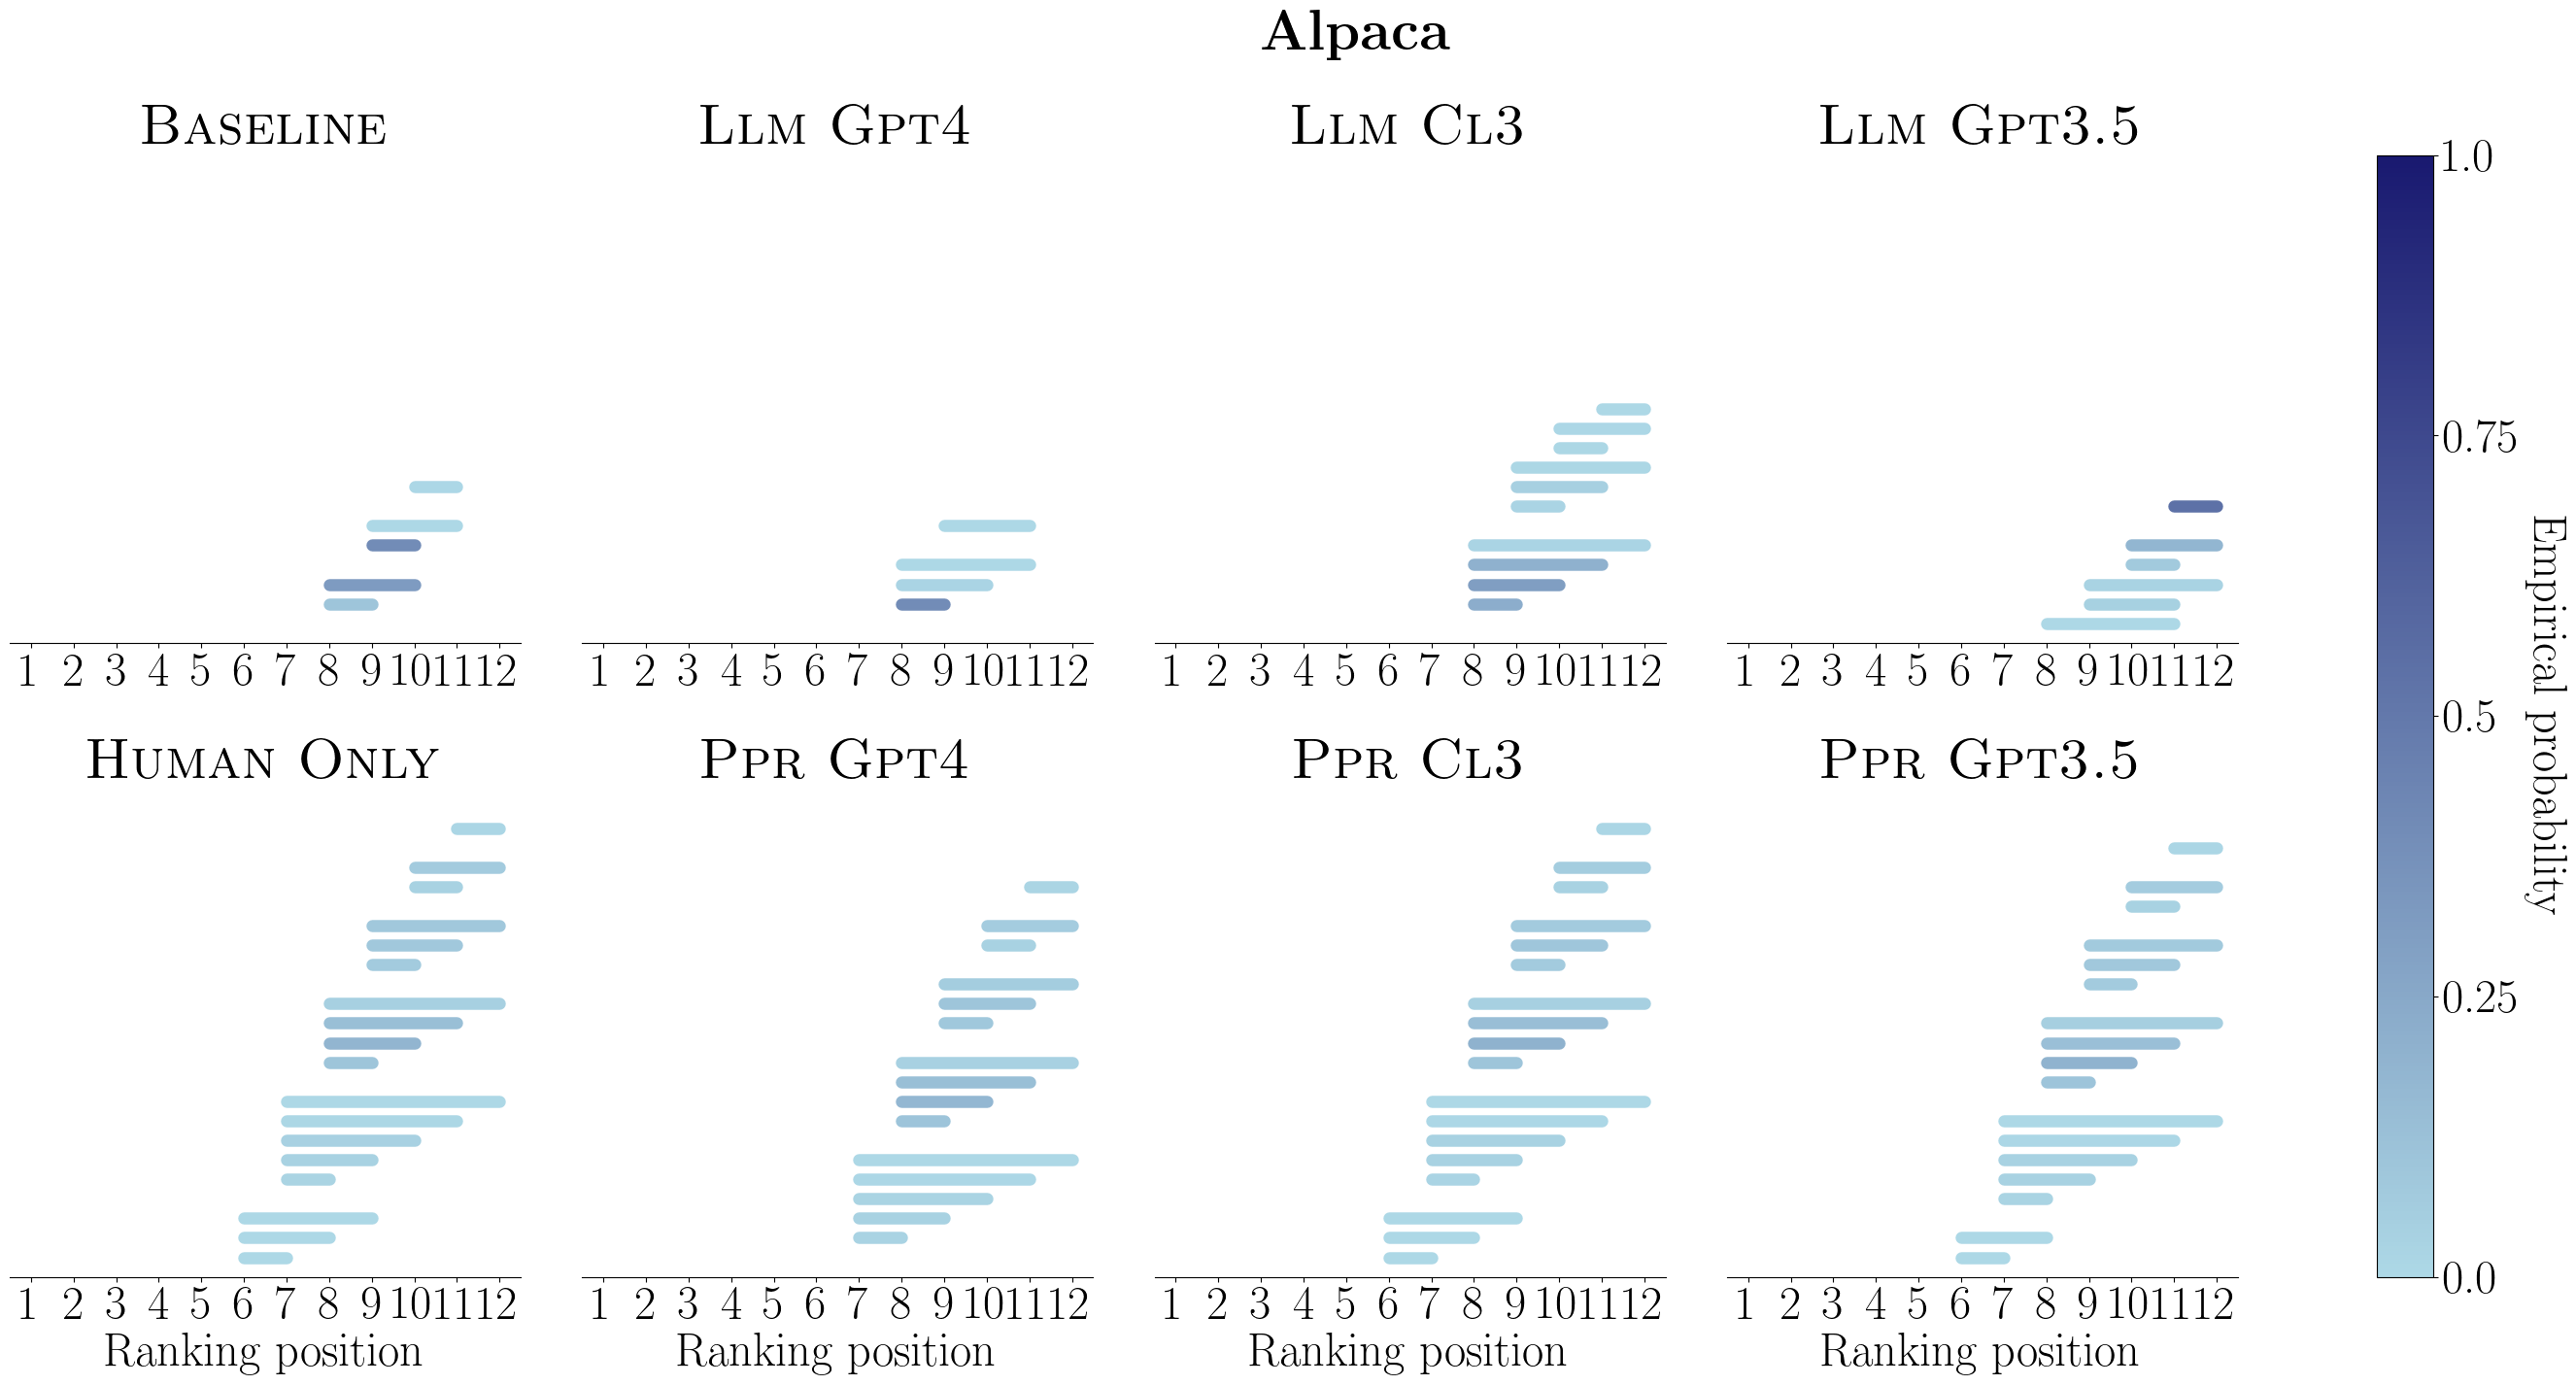

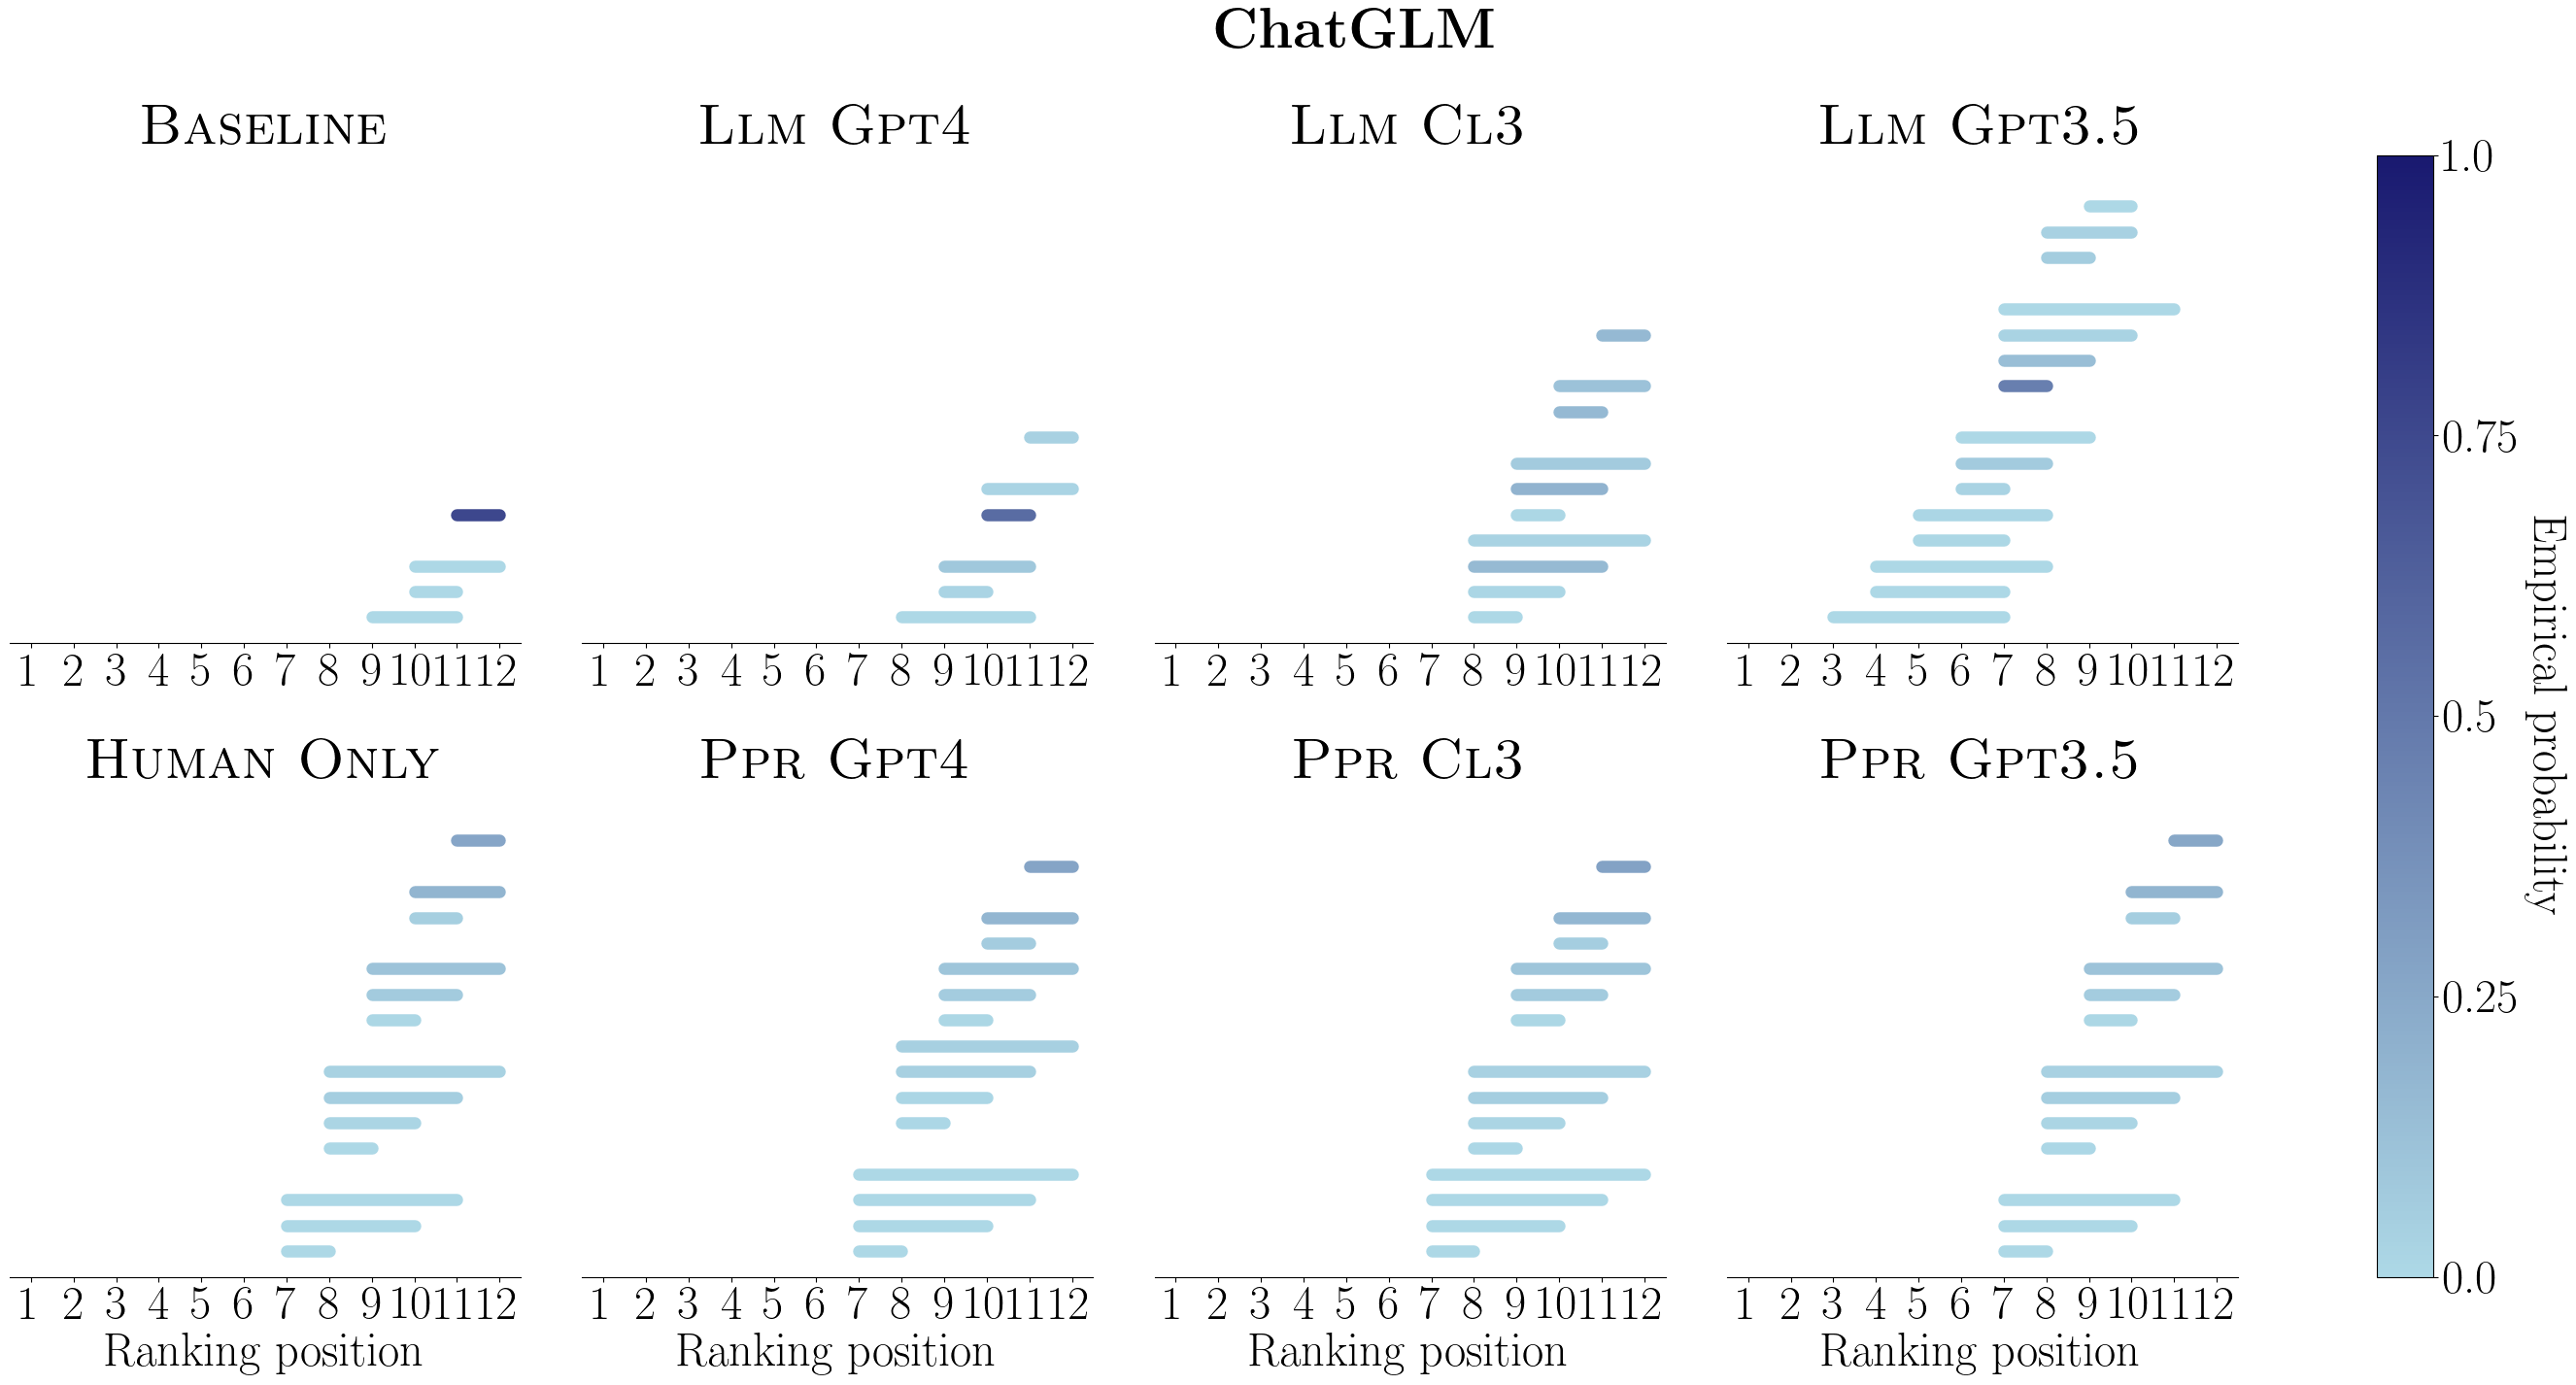

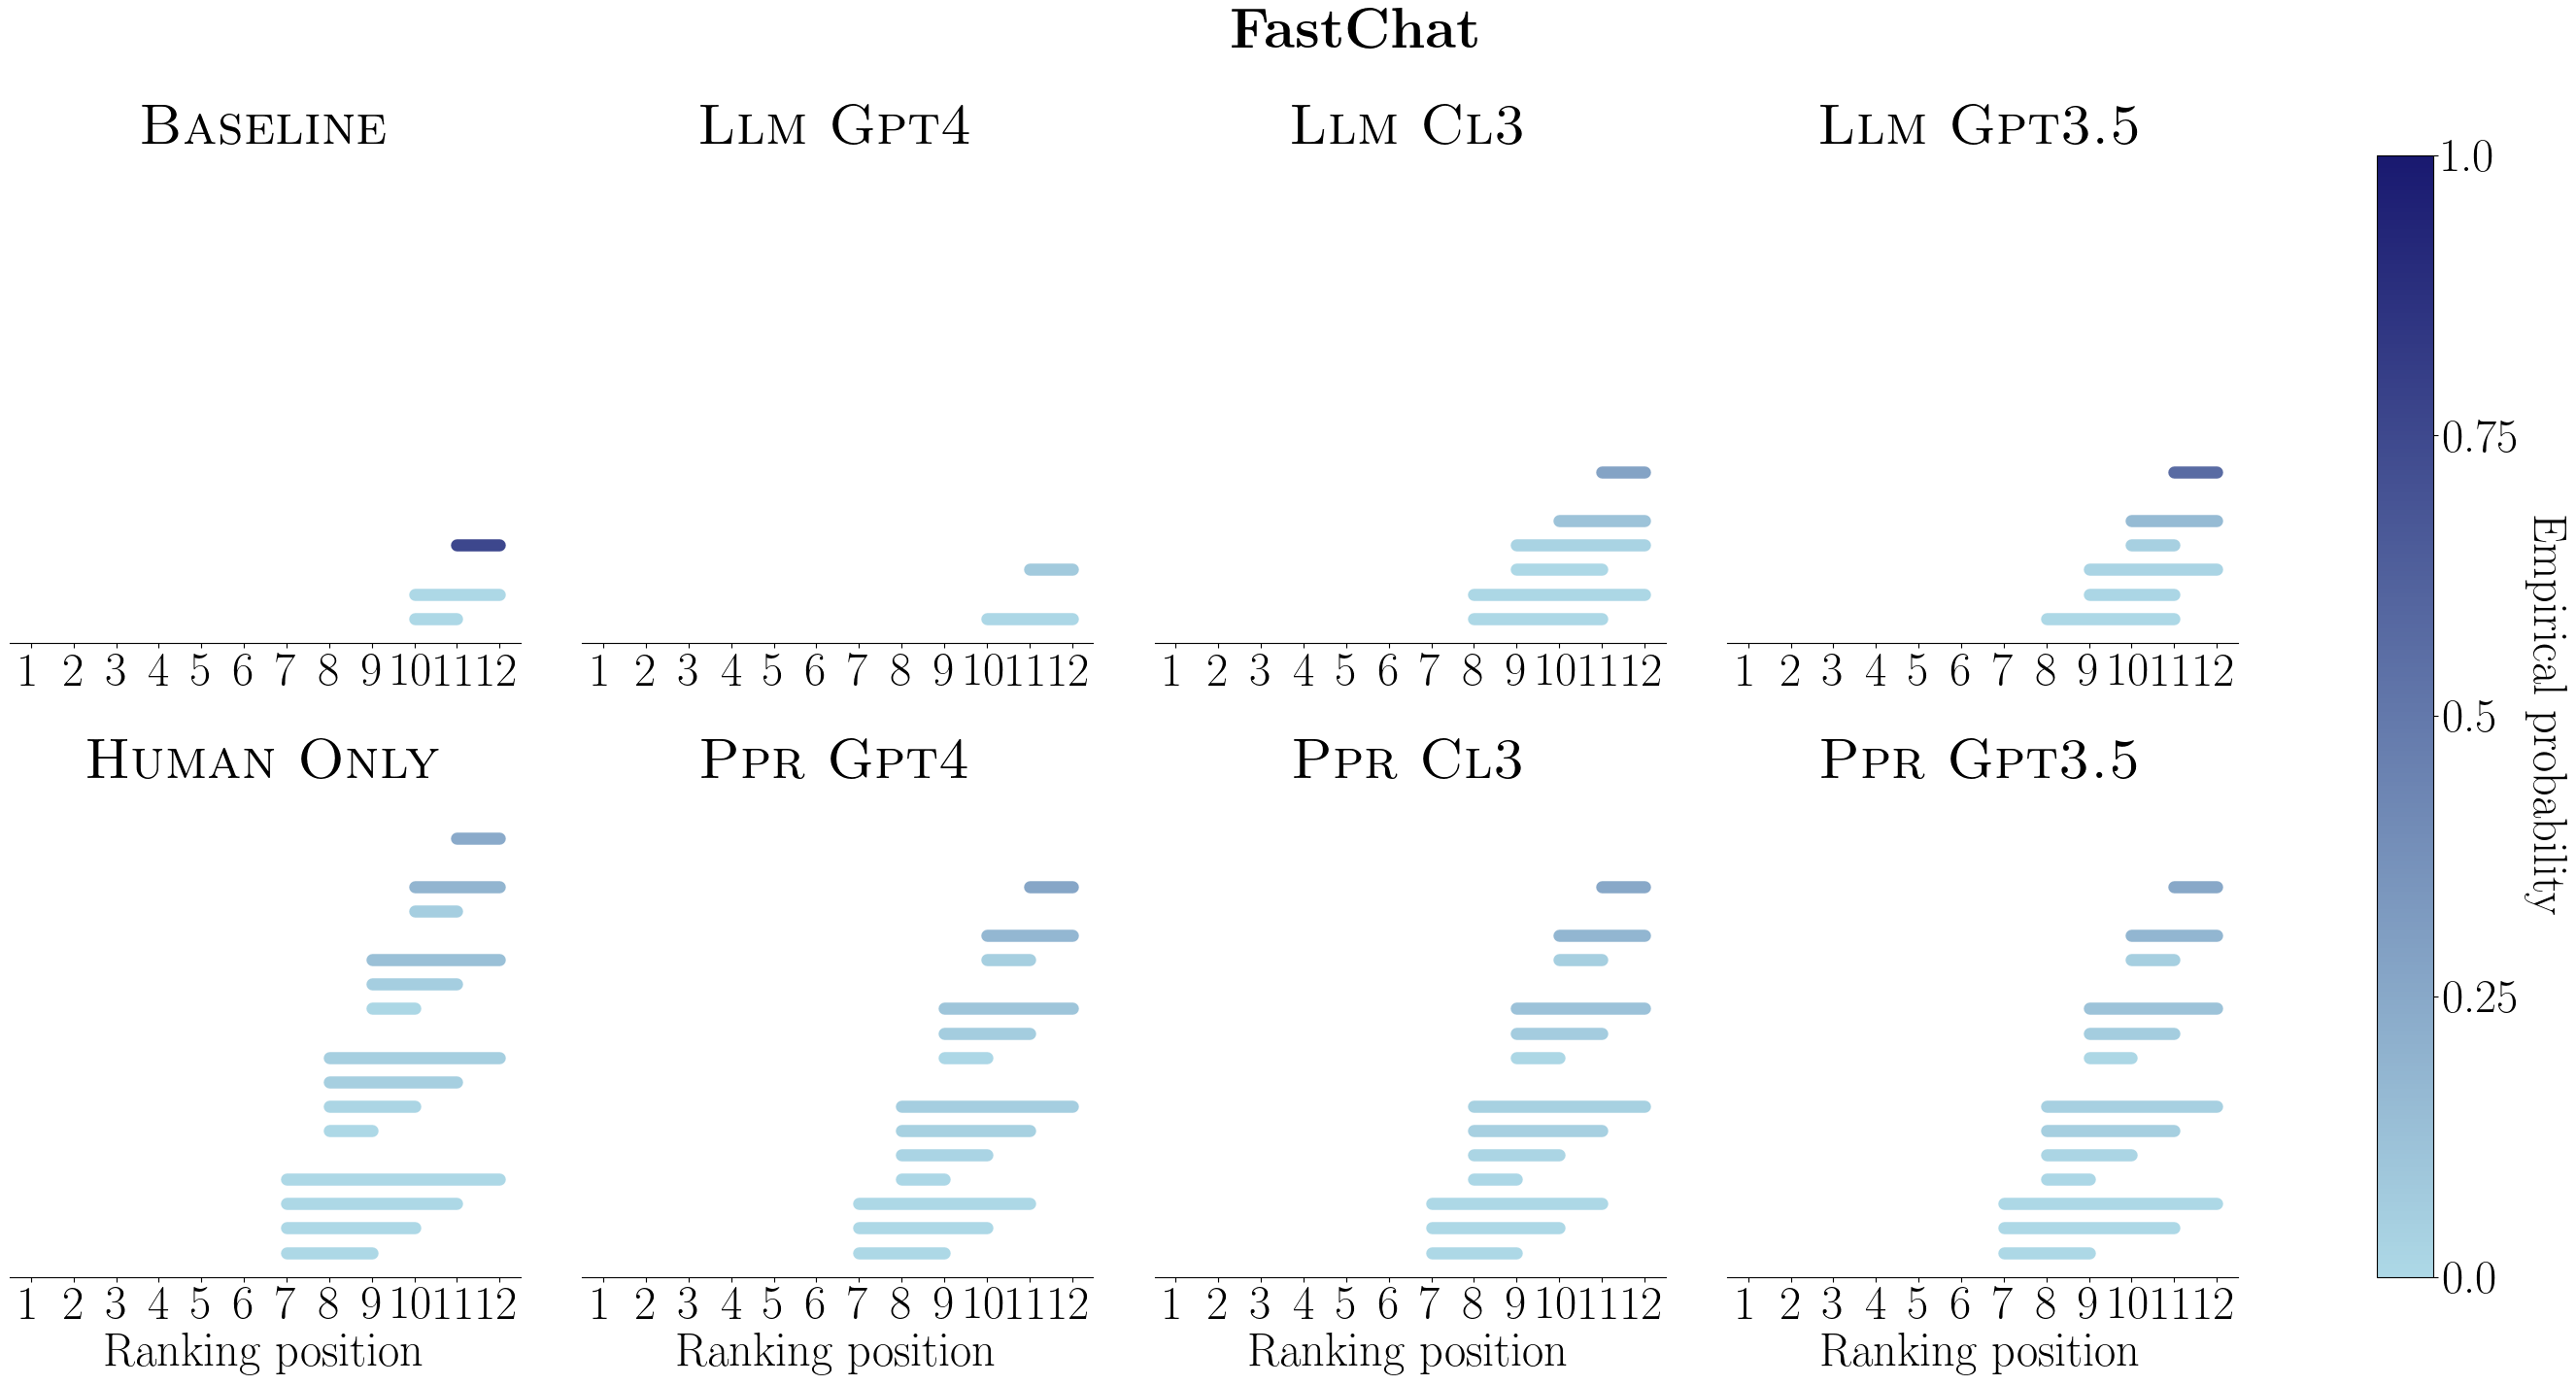

In [11]:
plotter=PlotRanksets(results,label_mapping)
plotter.set_model_mapping(model_mapping)
plotter.plot_ranksets_main(methods=['baseline','llm (gpt-4-0125-preview)','ppr (gpt-4-0125-preview)'],models=['gpt-4','claude-v1','vicuna-13b','palm-2'])

plotter.set_model_mapping(model_mapping_bold)
for model in results.models:
        plotter.plot_ranksets_all(results.methods,model)